In [392]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [306]:
train = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data Understanding

In [307]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [308]:
test_data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


In [309]:
train.shape

(58592, 44)

In [310]:
test_data.shape

(39063, 43)

In [311]:
train.sample(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
25043,ID25044,0.757010,0.00,0.298077,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,1
7963,ID07964,0.283368,0.01,0.298077,C2,27003,1,B1,M8,CNG,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,0
14061,ID14062,0.973961,0.02,0.326923,C4,21622,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
22368,ID22369,1.078186,0.04,0.471154,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
13993,ID13994,0.555264,0.07,0.461538,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0


In [312]:
train.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [313]:
train.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [314]:
test.shape

(39063, 42)

In [315]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [316]:
train.isnull().mean()*100

policy_id                           0.0
policy_tenure                       0.0
age_of_car                          0.0
age_of_policyholder                 0.0
area_cluster                        0.0
population_density                  0.0
make                                0.0
segment                             0.0
model                               0.0
fuel_type                           0.0
max_torque                          0.0
max_power                           0.0
engine_type                         0.0
airbags                             0.0
is_esc                              0.0
is_adjustable_steering              0.0
is_tpms                             0.0
is_parking_sensors                  0.0
is_parking_camera                   0.0
rear_brakes_type                    0.0
displacement                        0.0
cylinder                            0.0
transmission_type                   0.0
gear_box                            0.0
steering_type                       0.0


In [317]:
test_data.isnull().mean()*100

policy_id                           0.0
policy_tenure                       0.0
age_of_car                          0.0
age_of_policyholder                 0.0
area_cluster                        0.0
population_density                  0.0
make                                0.0
segment                             0.0
model                               0.0
fuel_type                           0.0
max_torque                          0.0
max_power                           0.0
engine_type                         0.0
airbags                             0.0
is_esc                              0.0
is_adjustable_steering              0.0
is_tpms                             0.0
is_parking_sensors                  0.0
is_parking_camera                   0.0
rear_brakes_type                    0.0
displacement                        0.0
cylinder                            0.0
transmission_type                   0.0
gear_box                            0.0
steering_type                       0.0


In [318]:
train.duplicated().sum()

0

In [319]:
test_data.duplicated().sum()

0

# Data Cleaning

In [320]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [321]:
train = train.drop(columns=["policy_id"])
test = test_data.drop(columns=["policy_id"])

In [322]:
train.iloc[:, :10].head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm


In [323]:
train["area_cluster"].unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [324]:
train["segment"].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [325]:
train["model"].unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [326]:
train["fuel_type"].unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [327]:
train["max_torque"].unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

In [328]:
train["max_torque"] = [float(j) for j in [i.split("@")[0].split("N")[0] for i in train["max_torque"]]]

test["max_torque"] = [float(j) for j in [i.split("@")[0].split("N")[0] for i in test["max_torque"]]]

In [329]:
train["max_torque"].unique()

array([ 60. , 113. ,  91. , 250. , 200. ,  82.1,  85. , 170. ])

In [330]:
train.iloc[:,10:20]

,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement
0,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796
1,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796
2,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796
3,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197
4,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999
...,...,...,...,...,...,...,...,...,...,...
58587,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999
58588,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796
58589,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796
58590,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197


In [331]:
train["max_power"].unique()

array(['40.36bhp@6000rpm', '88.50bhp@6000rpm', '67.06bhp@5500rpm',
       '113.45bhp@4000rpm', '88.77bhp@4000rpm', '55.92bhp@5300rpm',
       '97.89bhp@3600rpm', '61.68bhp@6000rpm', '118.36bhp@5500rpm'],
      dtype=object)

In [332]:
train["max_power"] = [float(j) for j in [i.split("@")[0].split("b")[0] for i in train["max_power"]]]

test["max_power"] = [float(j) for j in [i.split("@")[0].split("b")[0] for i in test["max_power"]]]

In [333]:
train["max_power"].unique()

array([ 40.36,  88.5 ,  67.06, 113.45,  88.77,  55.92,  97.89,  61.68,
       118.36])

In [334]:
train["engine_type"].unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [335]:
train["rear_brakes_type"].unique()

array(['Drum', 'Disc'], dtype=object)

In [336]:
train.iloc[:, 20:30]

,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights
0,3,Manual,5,Power,4.6,3445,1515,1475,1185,No
1,3,Manual,5,Power,4.6,3445,1515,1475,1185,No
2,3,Manual,5,Power,4.6,3445,1515,1475,1185,No
3,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes
4,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No
...,...,...,...,...,...,...,...,...,...,...
58587,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No
58588,3,Manual,5,Power,4.6,3445,1515,1475,1185,No
58589,3,Manual,5,Power,4.6,3445,1515,1475,1185,No
58590,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes


In [337]:
train["transmission_type"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [338]:
train["steering_type"].unique()

array(['Power', 'Electric', 'Manual'], dtype=object)

In [339]:
train.iloc[:, 30:40]

,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw
0,No,No,No,No,No,No,Yes,No,No,No
1,No,No,No,No,No,No,Yes,No,No,No
2,No,No,No,No,No,No,Yes,No,No,No
3,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
58587,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes
58588,No,No,No,No,No,No,Yes,No,No,No
58589,No,No,No,No,No,No,Yes,No,No,No
58590,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [340]:
train.iloc[:, 40:]

,is_speed_alert,ncap_rating,is_claim
0,Yes,0,0
1,Yes,0,0
2,Yes,0,0
3,Yes,2,0
4,Yes,2,0
...,...,...,...
58587,Yes,2,0
58588,Yes,0,0
58589,Yes,0,0
58590,Yes,2,0


In [341]:
train["is_claim"].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [342]:
# train.drop(columns=["policy_id", "area_cluster","engine_type","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","displacement","is_driver_seat_height_adjustable","is_day_night_rear_view_mirror"], inplace=True)
# test = org_test.drop(columns=["policy_id", "area_cluster","engine_type","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","displacement","is_driver_seat_height_adjustable","is_day_night_rear_view_mirror"])

In [343]:
train.shape

(58592, 43)

In [344]:
train.shape

(58592, 43)

In [345]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91.0,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [346]:
test.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60.0,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113.0,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91.0,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60.0,...,No,No,No,No,Yes,No,No,No,Yes,0
4,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60.0,...,No,No,No,No,Yes,No,No,No,Yes,0


# Exploratory Data Analysis

In [347]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91.0,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [348]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  float64
 10  max_power                         58592 non-null  float64
 11  engine_type                       58592 non-null  object 
 12  airb

Univariant Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


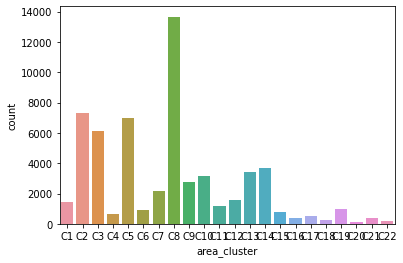

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


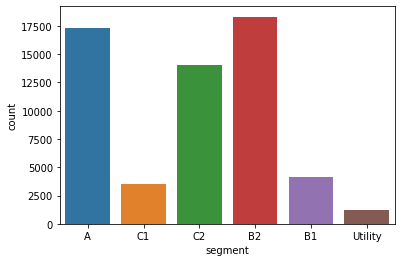

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


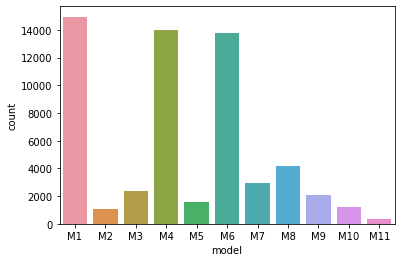

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


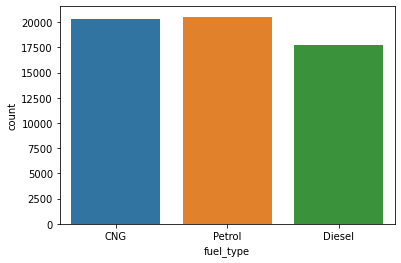

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


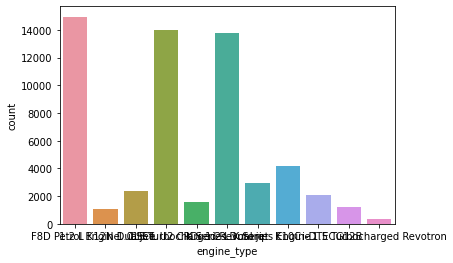

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


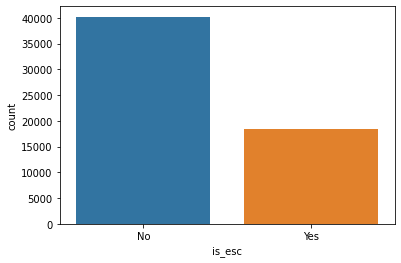

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


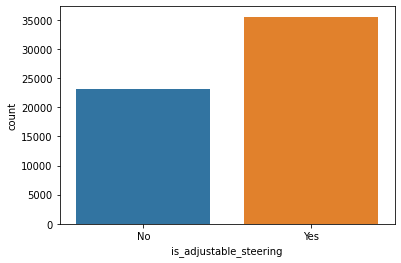

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


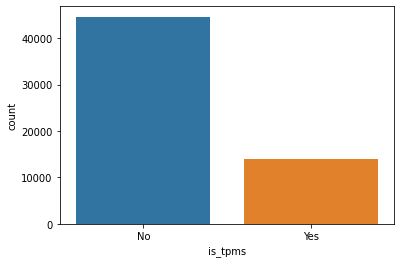

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


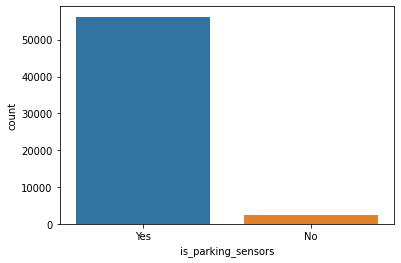

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


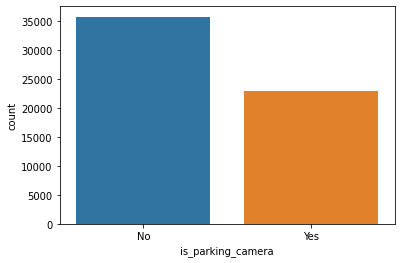

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


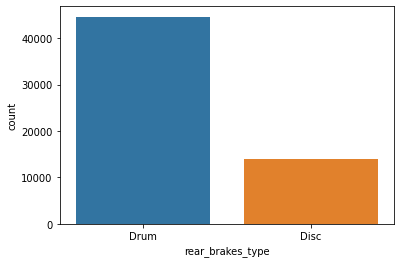

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


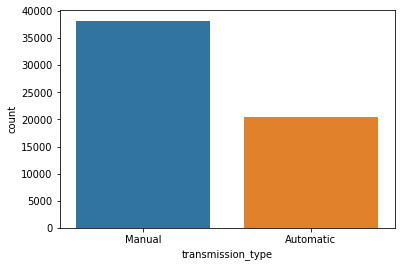

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


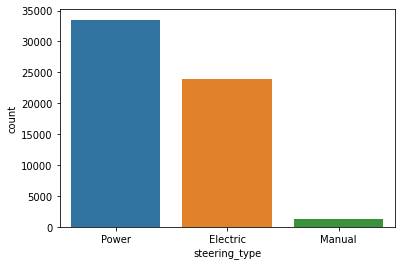

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


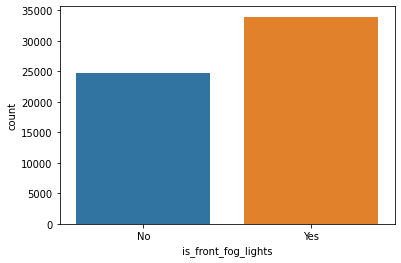

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


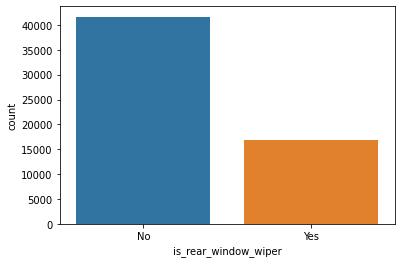

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


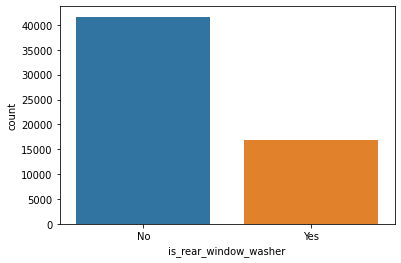

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


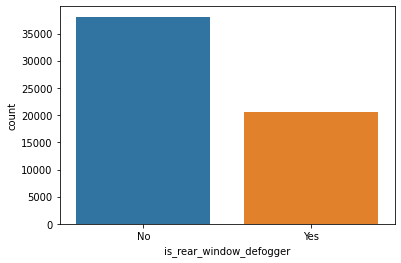

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


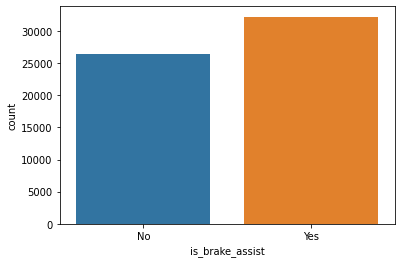

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


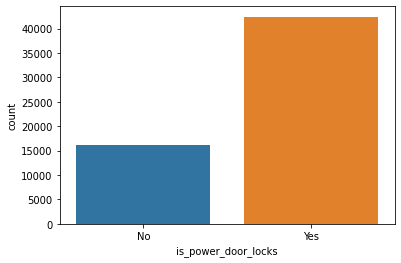

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


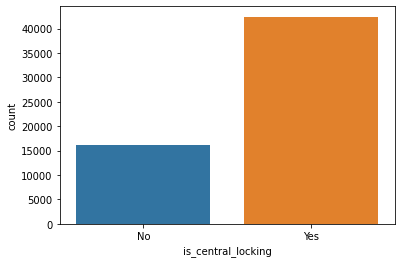

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


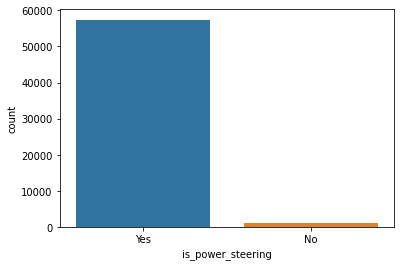

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


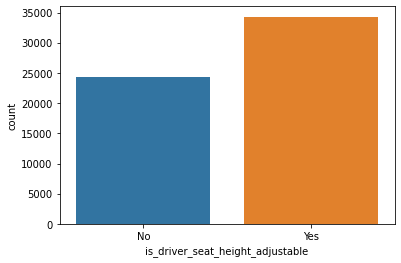

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


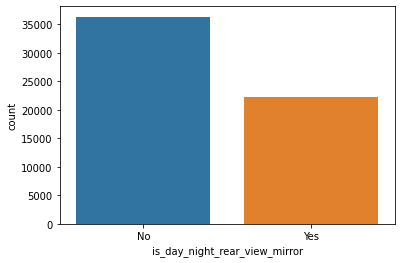

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


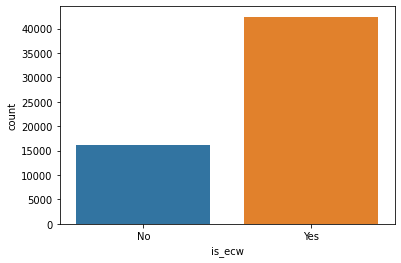

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


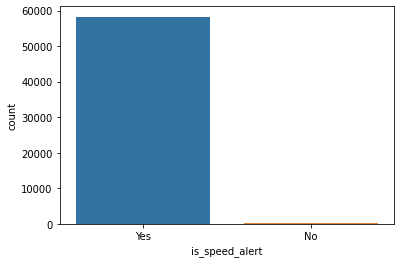

In [349]:
# Bar Plot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(sns.countplot(train[train.columns[i]]))

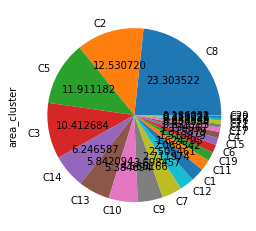

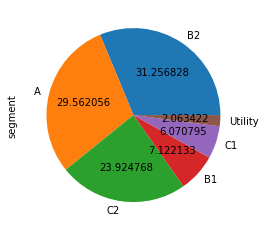

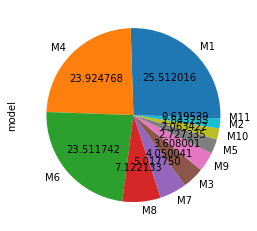

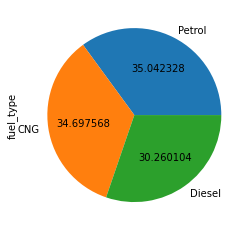

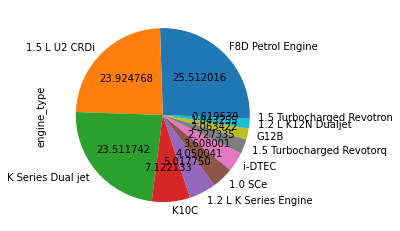

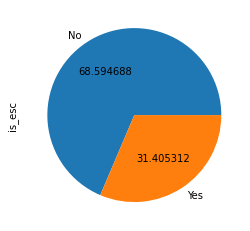

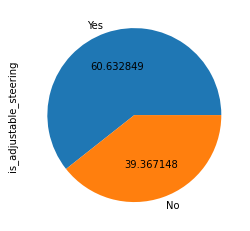

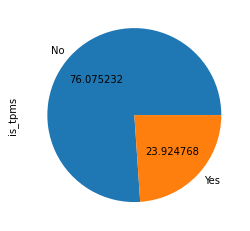

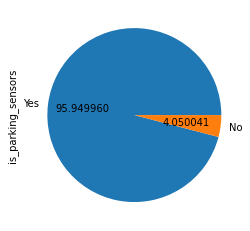

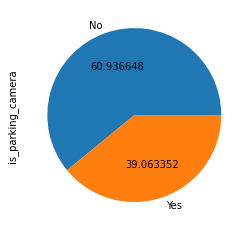

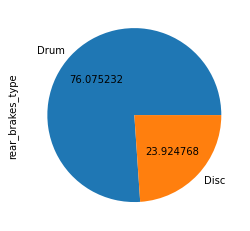

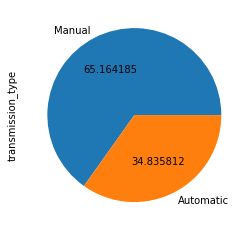

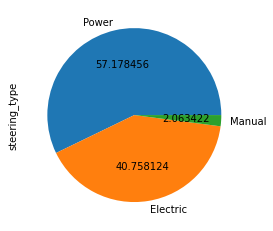

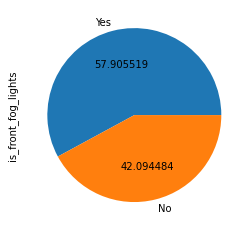

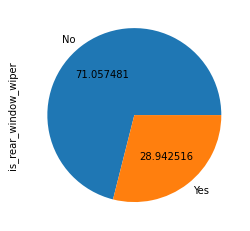

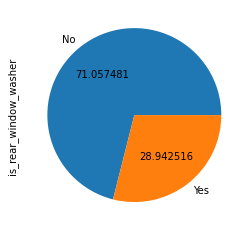

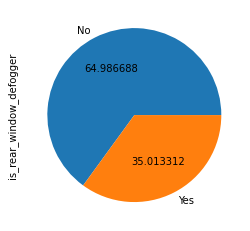

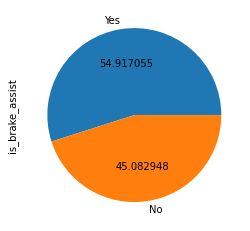

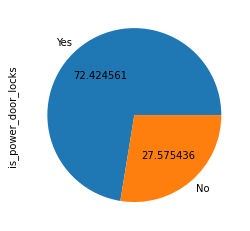

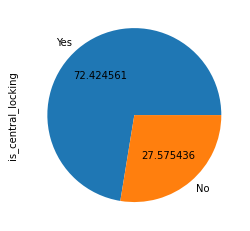

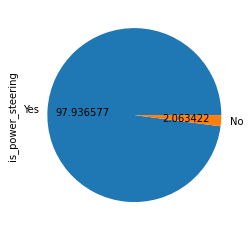

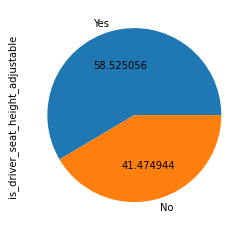

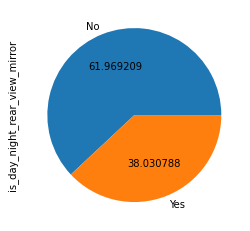

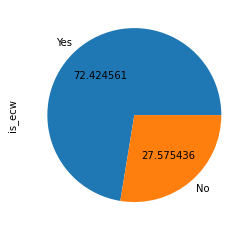

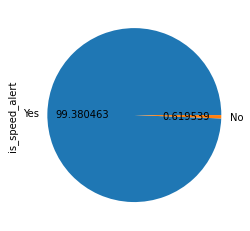

In [350]:
# Pie Chart
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(train[train.columns[i]].value_counts().plot(kind="pie", autopct="%2f"))

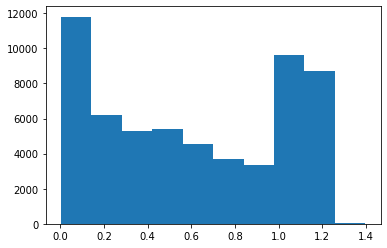

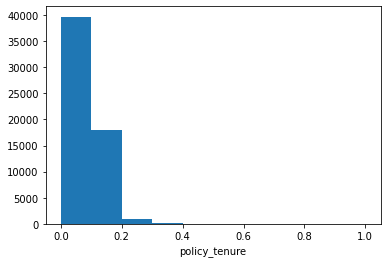

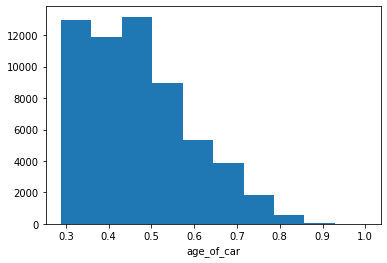

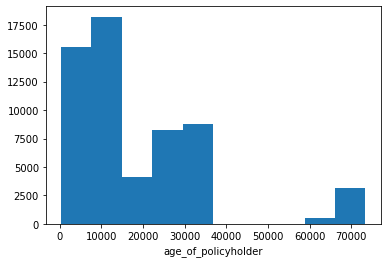

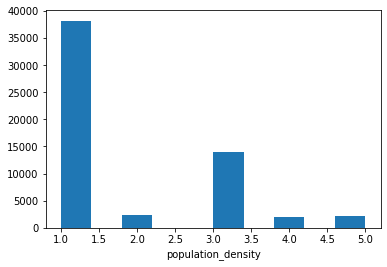

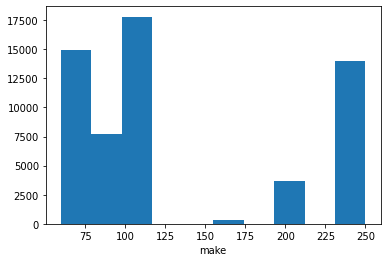

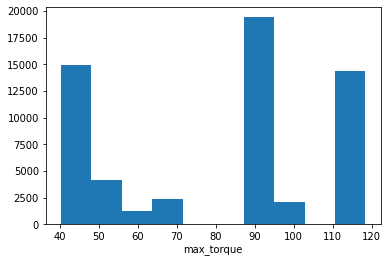

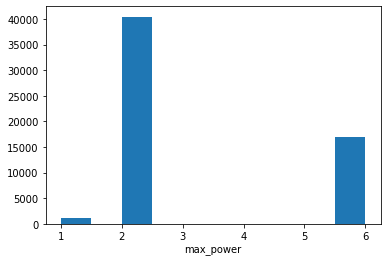

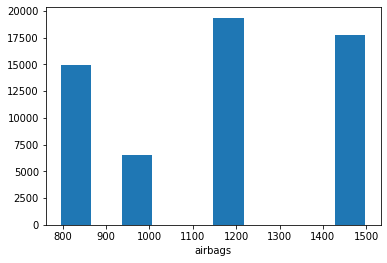

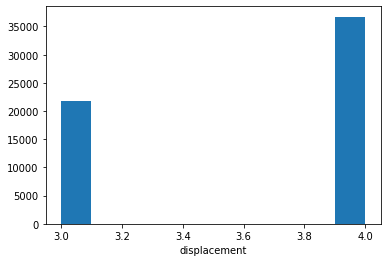

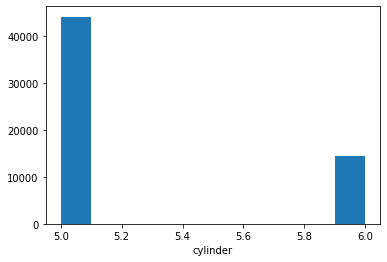

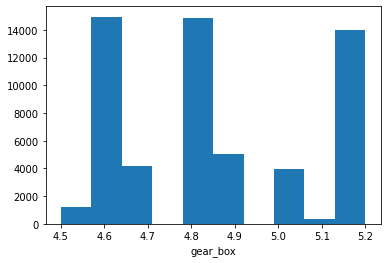

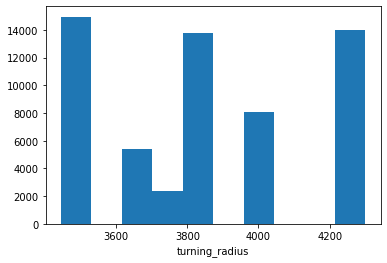

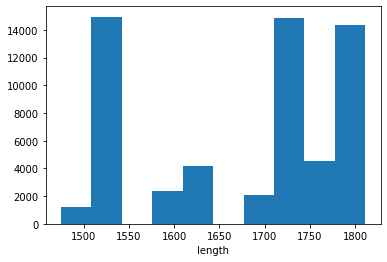

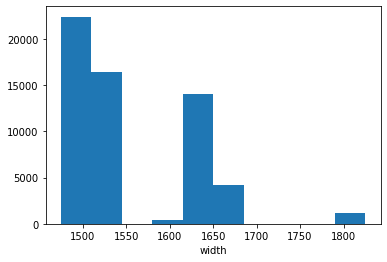

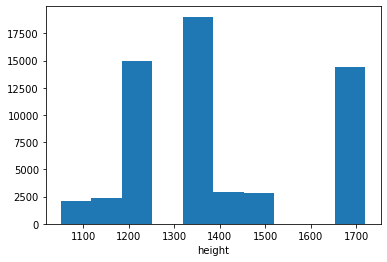

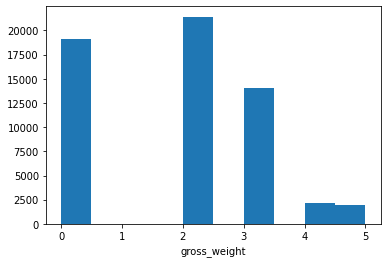

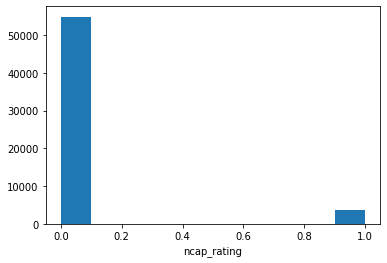

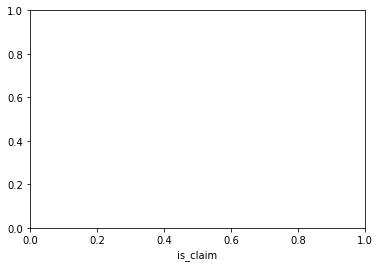

In [351]:
# Histogram
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(plt.hist(train[train.columns[i]]))
        plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


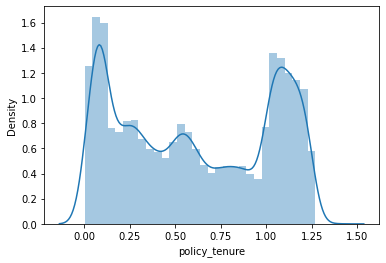

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


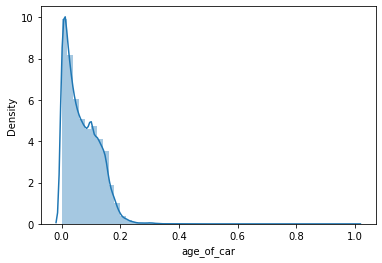

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


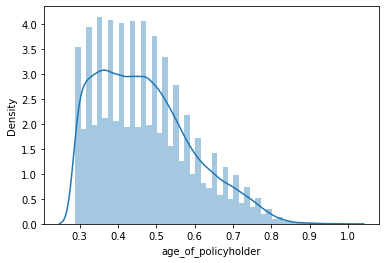

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


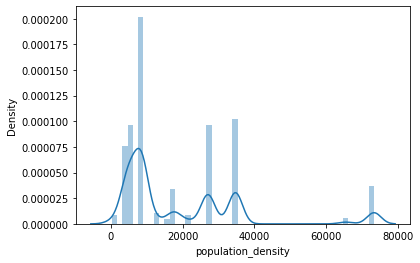

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


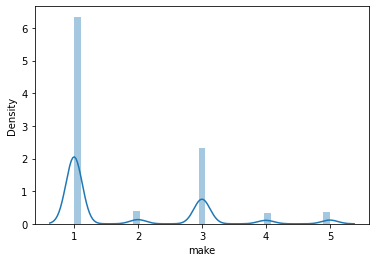

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


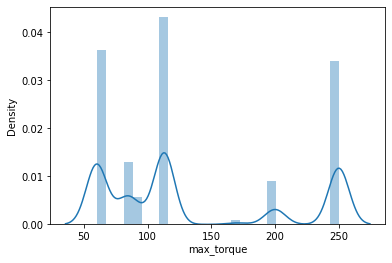

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


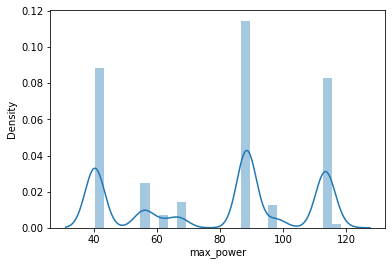

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


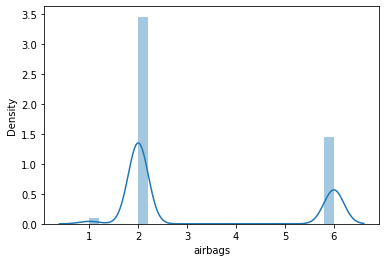

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


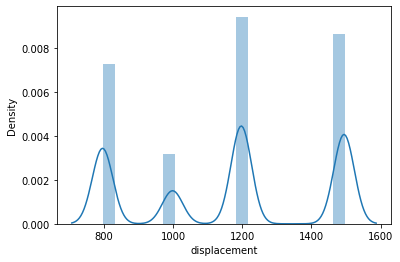

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


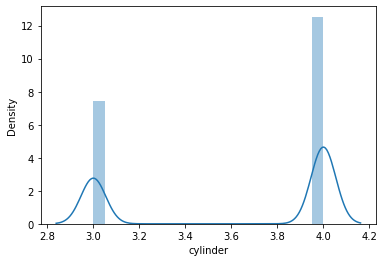

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


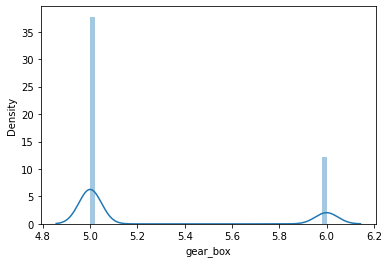

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


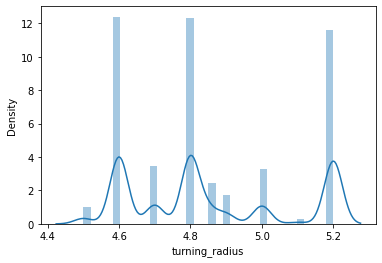

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


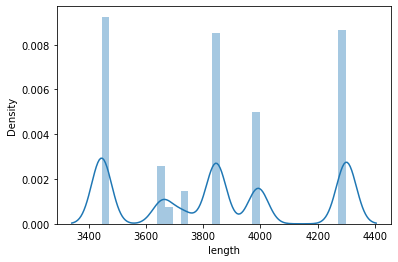

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


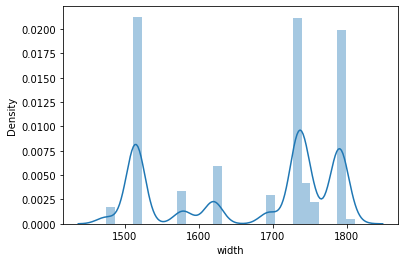

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


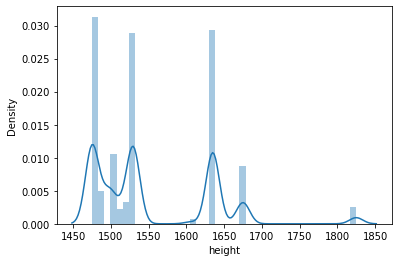

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


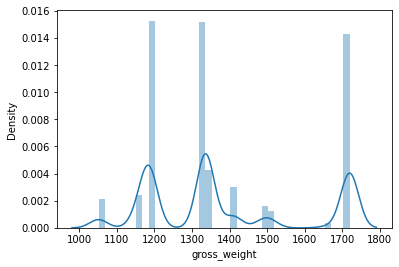

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


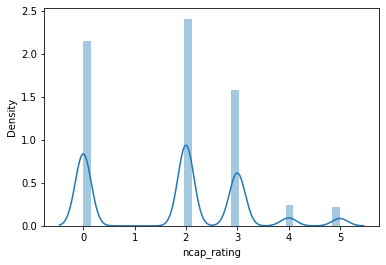

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


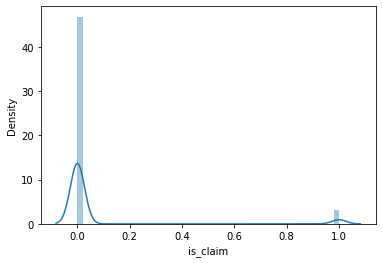

In [352]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


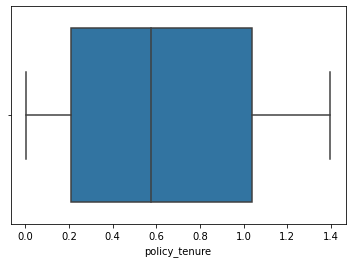

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


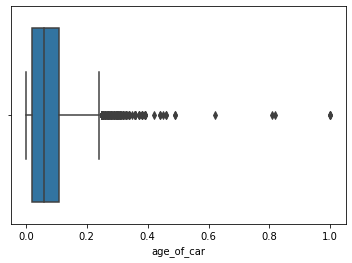

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


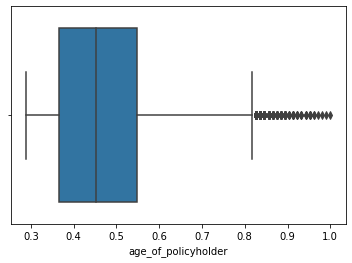

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


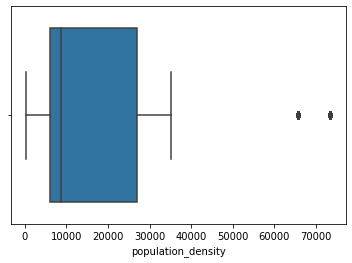

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


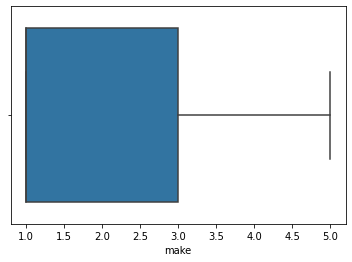

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


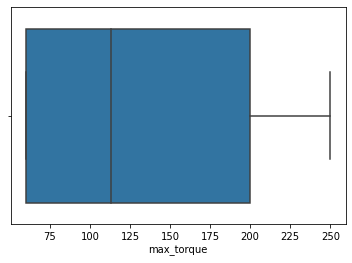

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


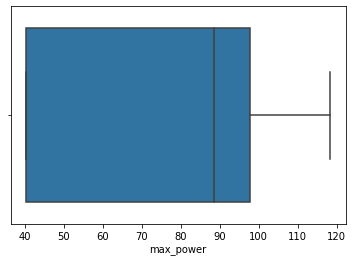

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


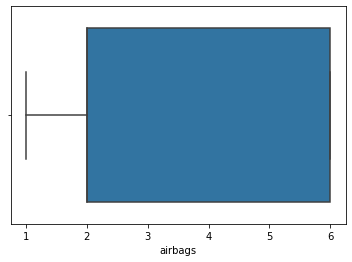

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


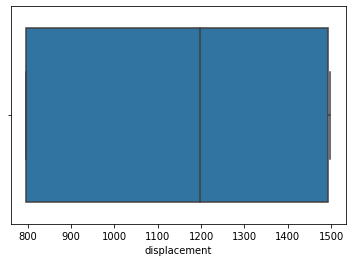

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


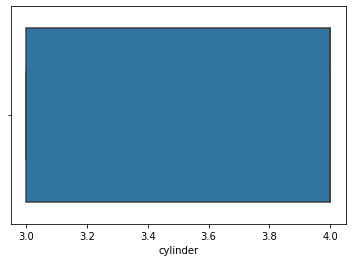

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


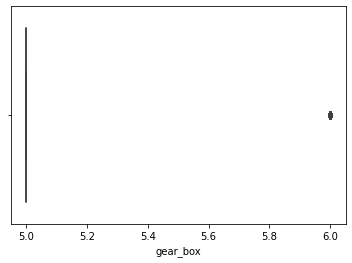

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


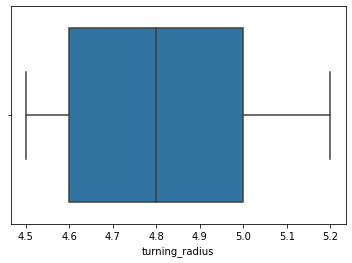

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


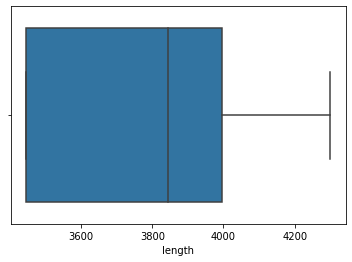

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


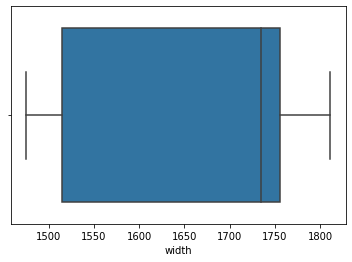

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


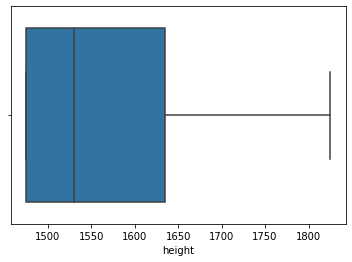

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


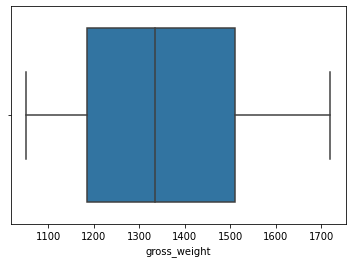

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


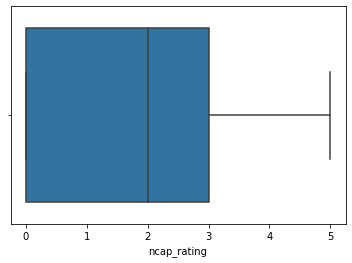

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


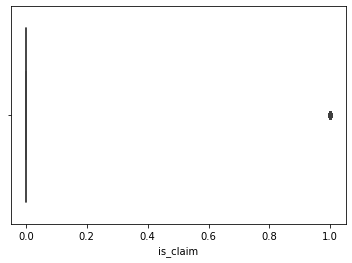

In [353]:
# Boxplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

Multivariant Analysis

In [354]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91.0,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [355]:
# #sns.pairplot(train, hue ="species")
# sns.pairplot(train)

In [356]:
train.shape

(58592, 43)

In [357]:
test.shape

(39063, 42)

# Feature Transformation

Outlier Detection

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


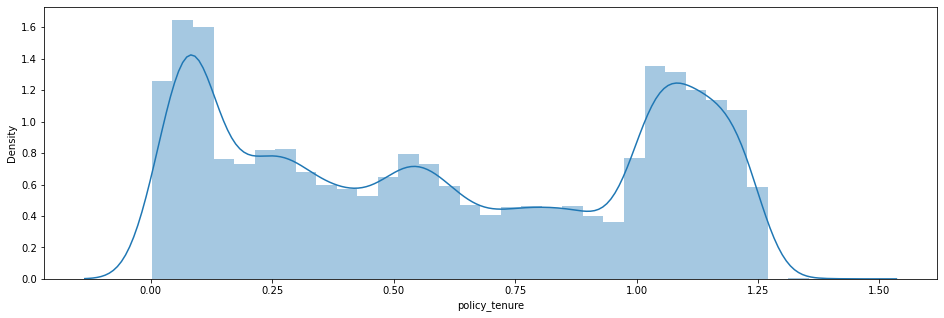

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


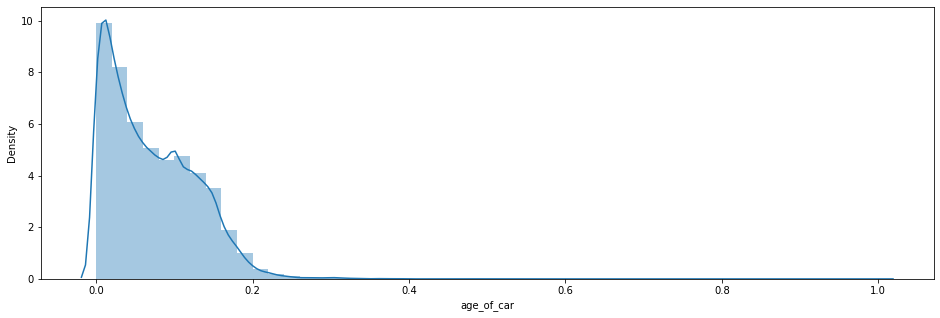

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


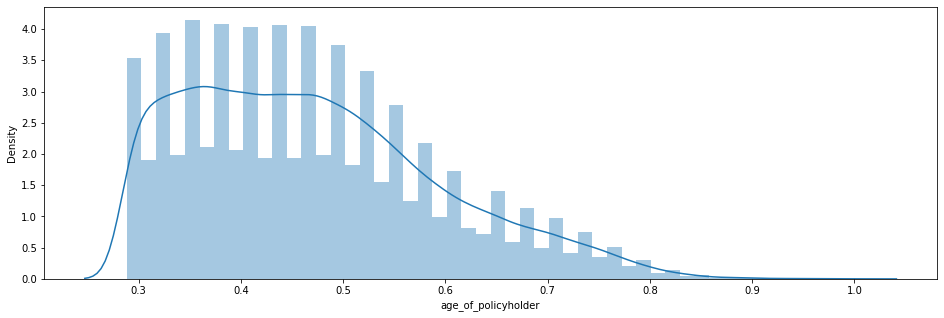

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


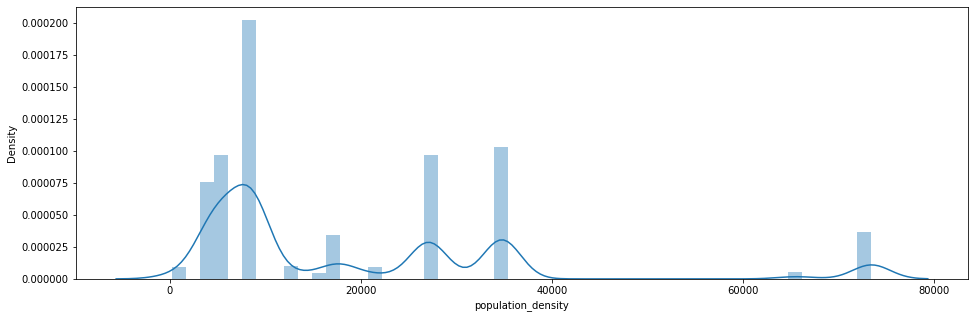

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


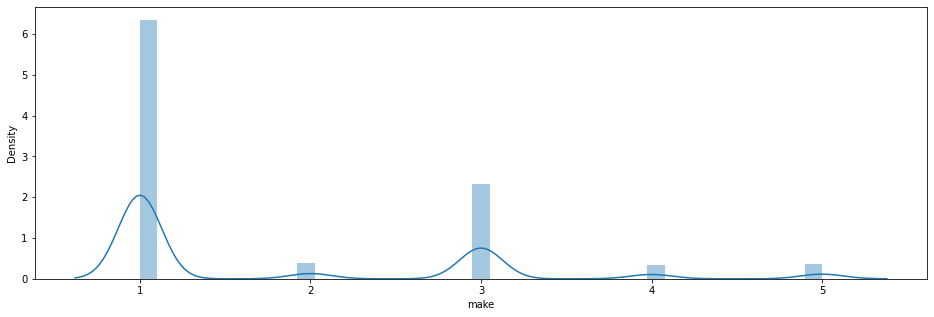

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


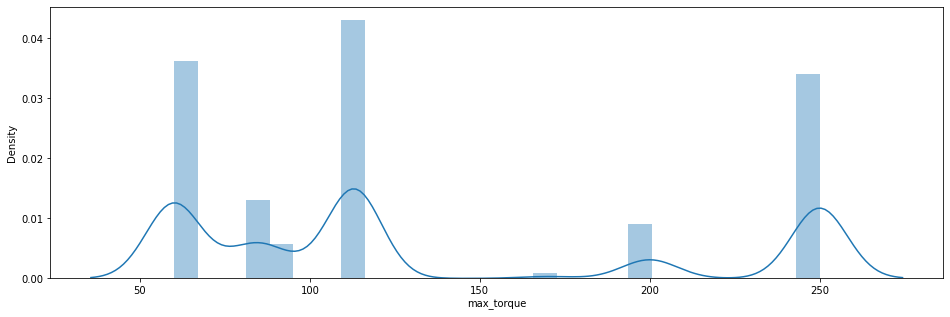

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


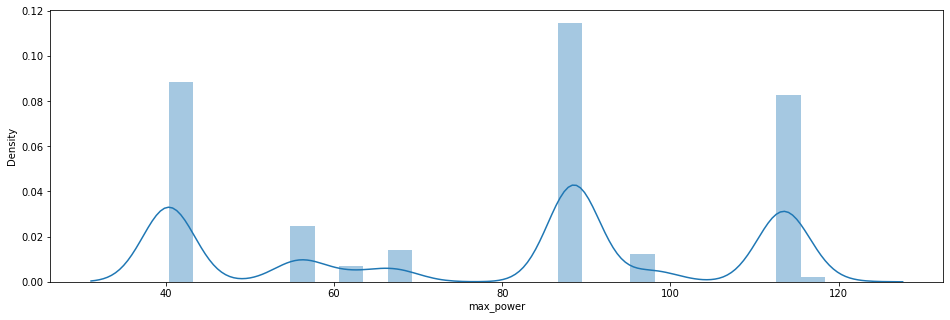

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


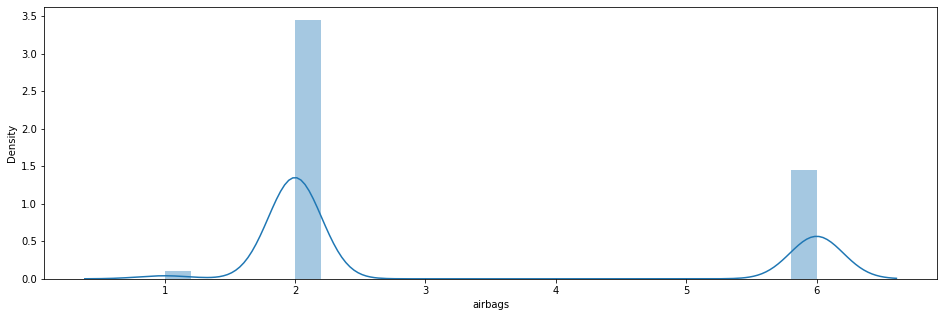

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


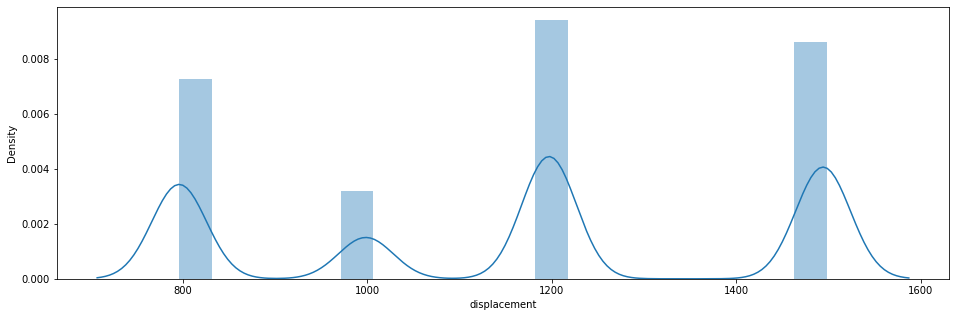

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


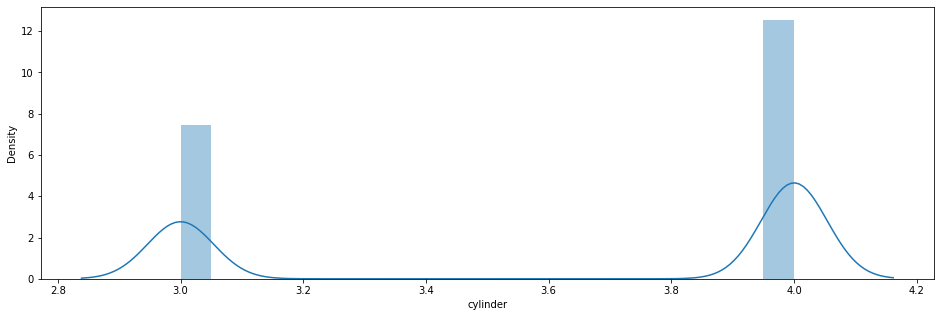

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


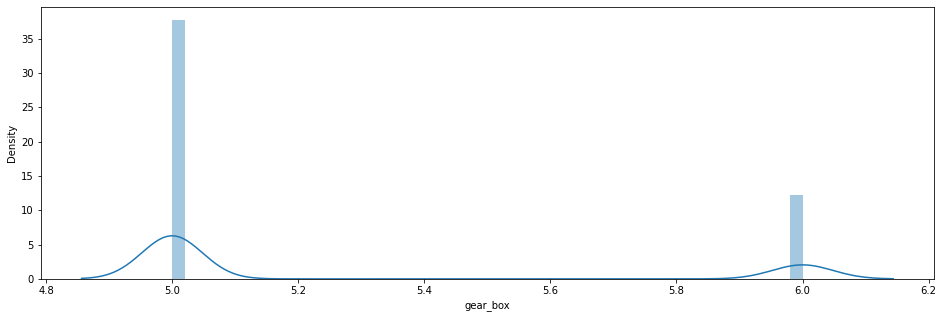

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


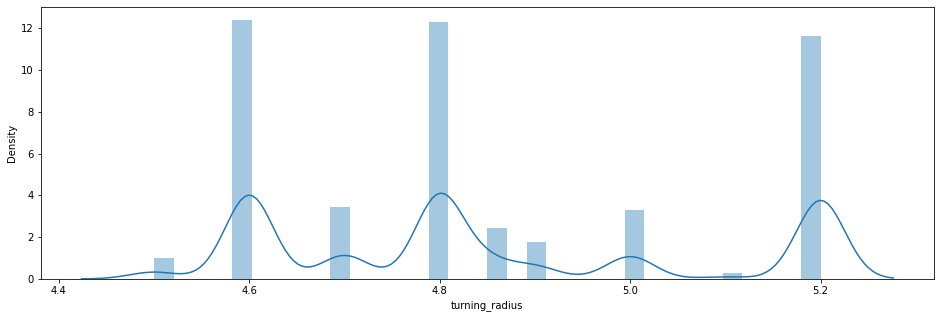

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


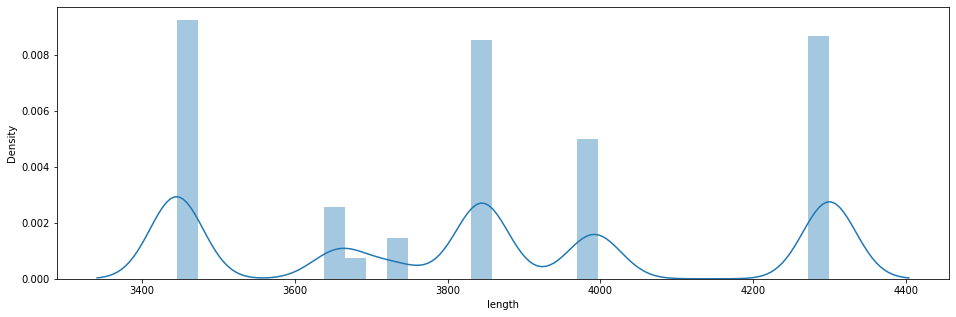

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


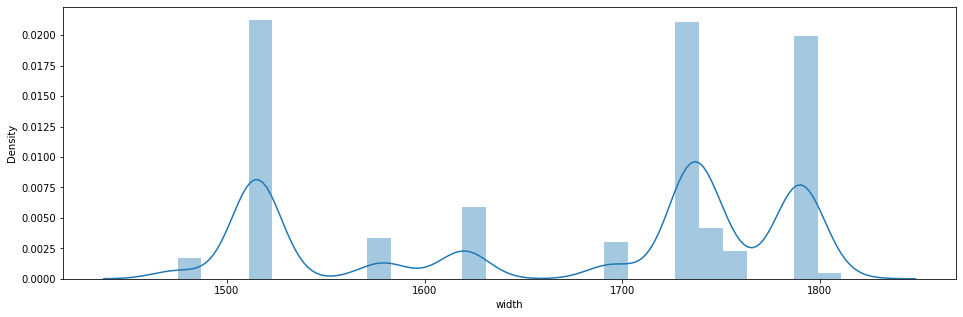

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


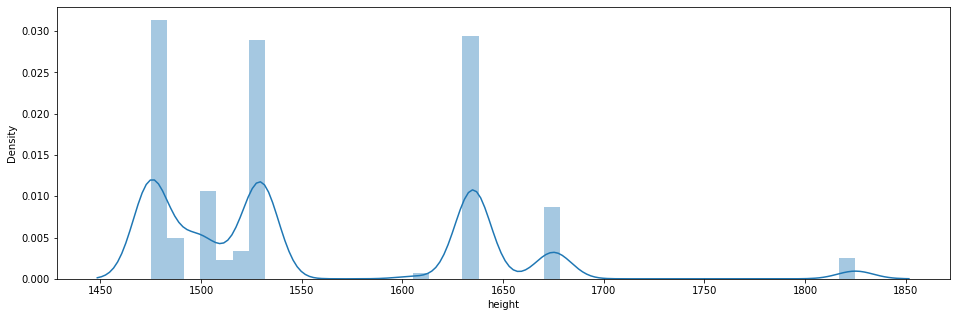

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


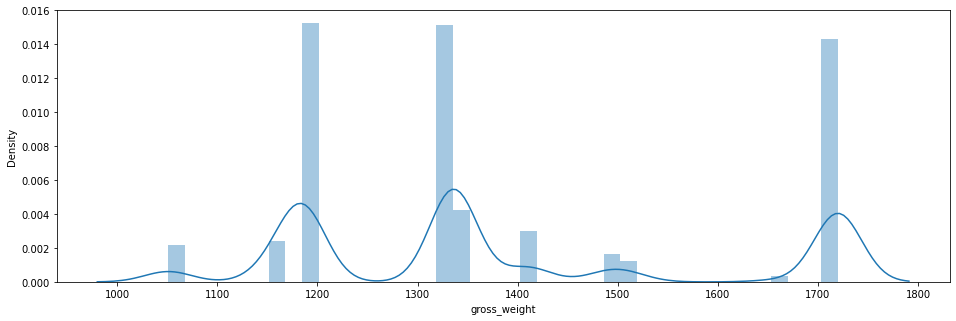

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


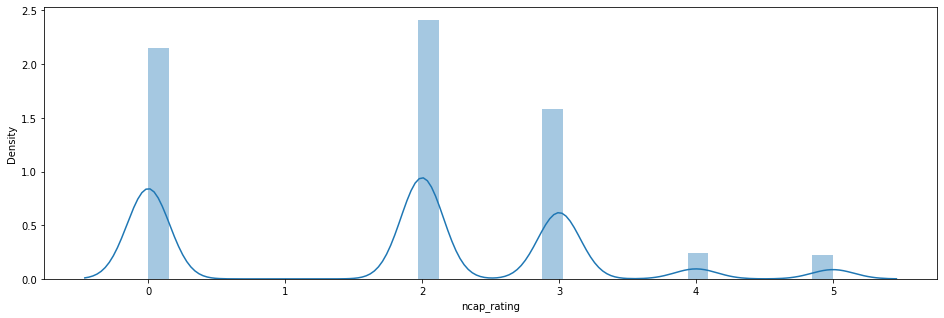

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


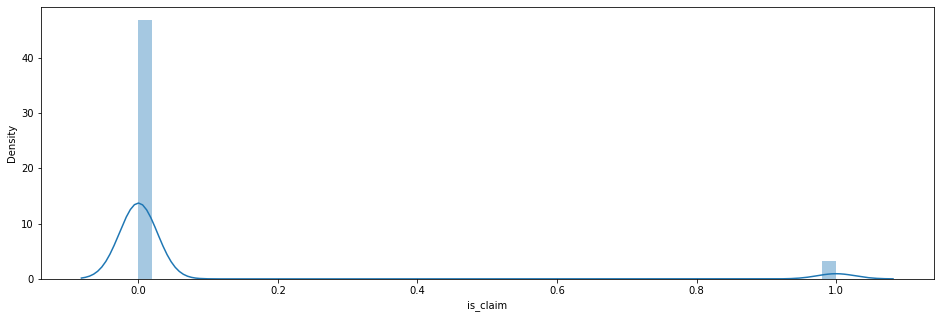

In [358]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(train[train.columns[i]])
        plt.show()

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


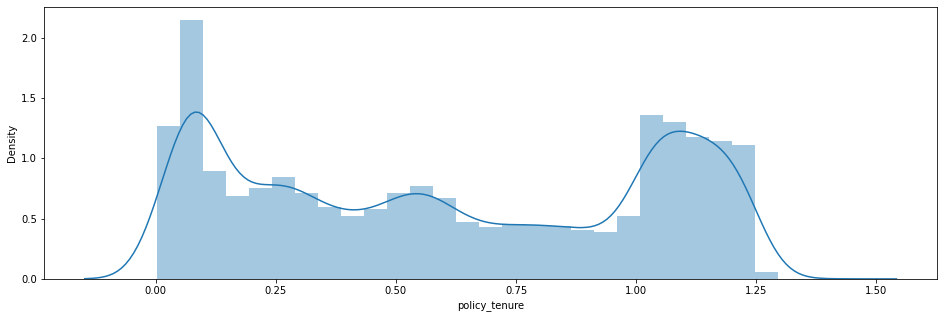

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


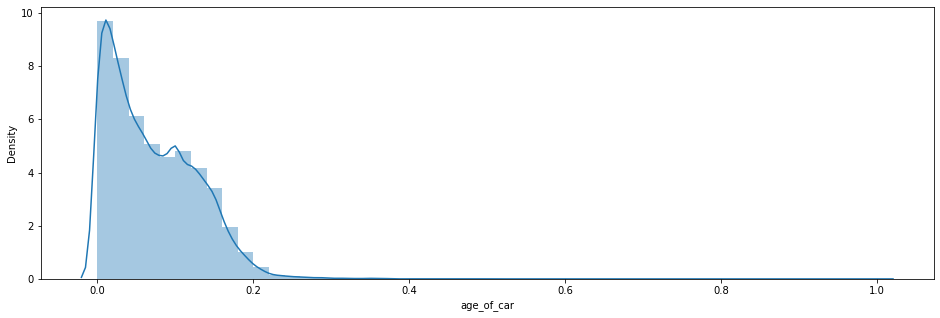

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


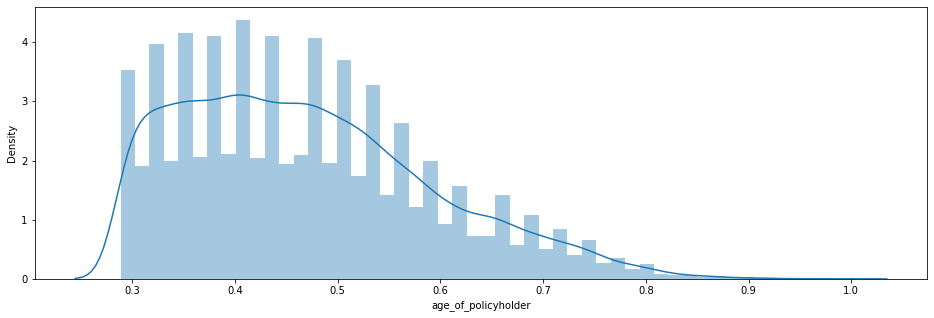

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


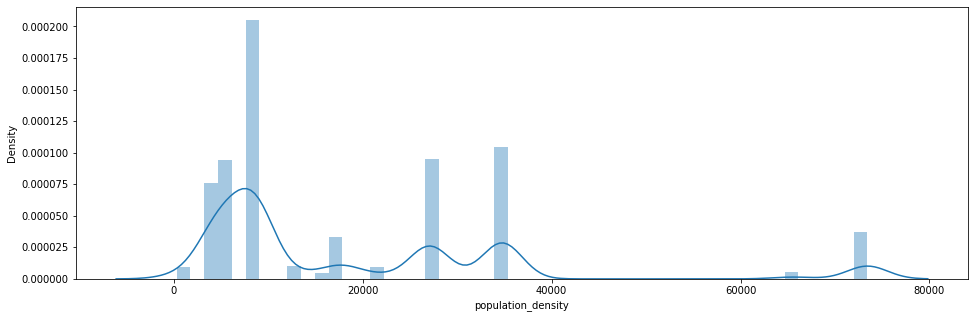

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


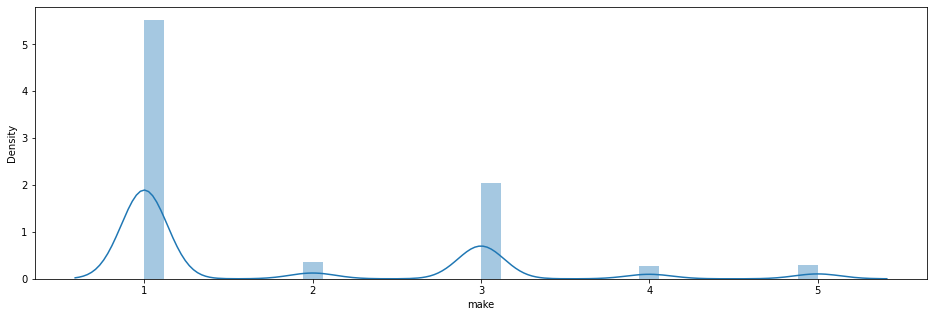

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


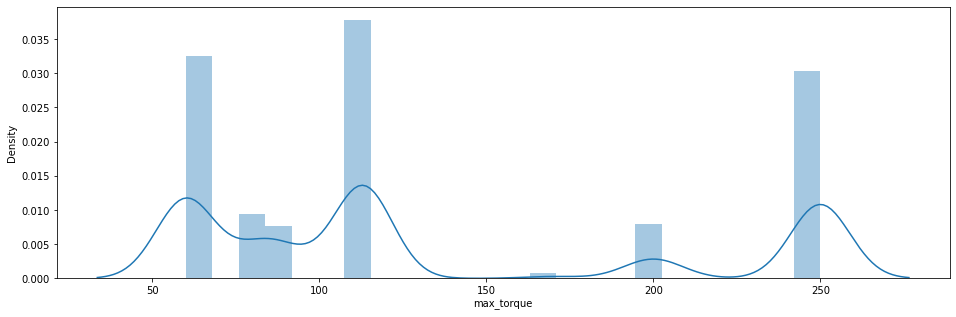

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


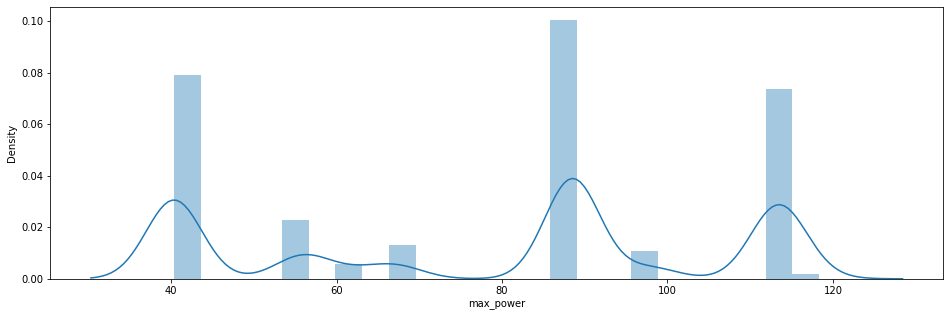

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


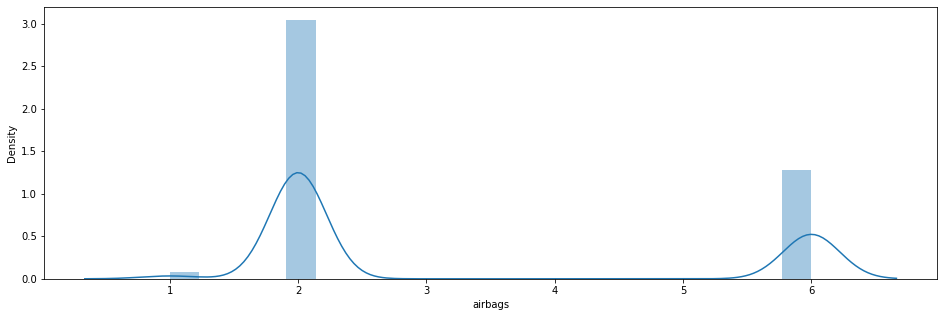

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


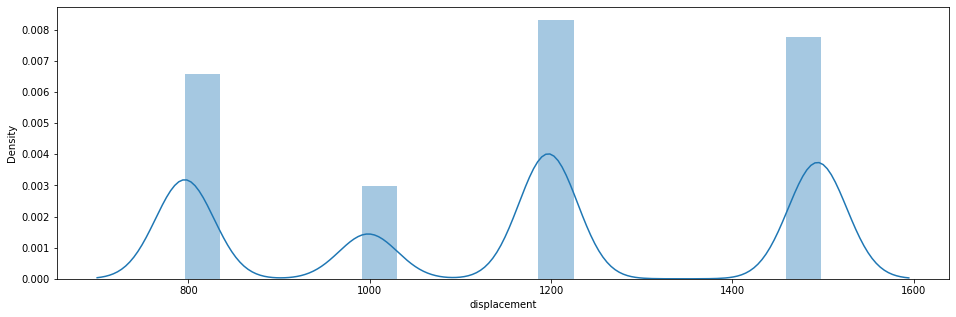

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


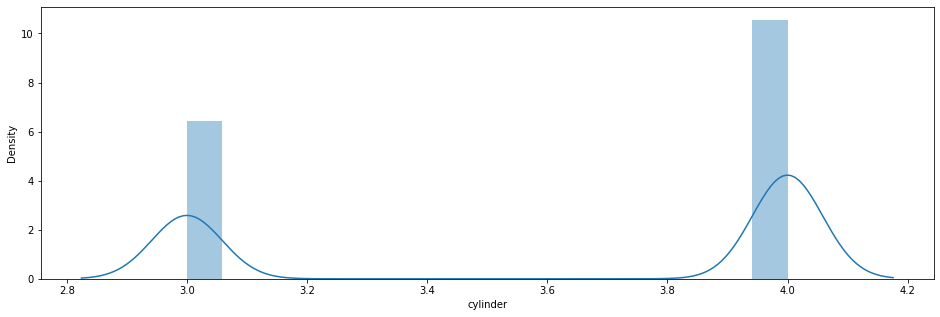

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


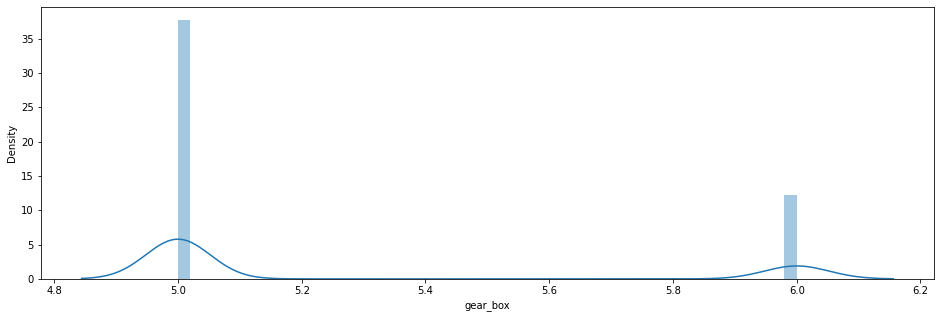

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


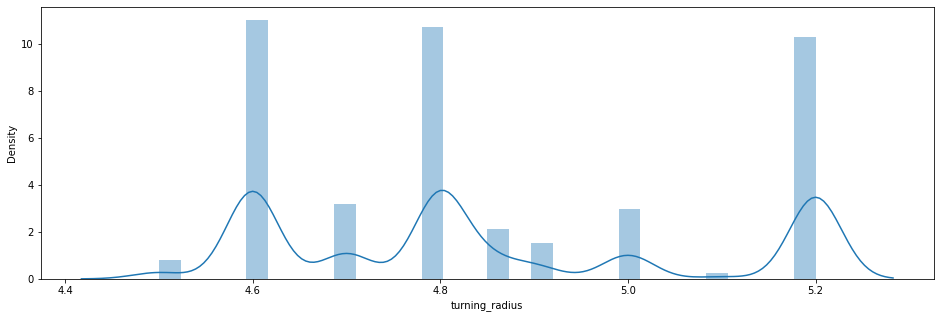

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


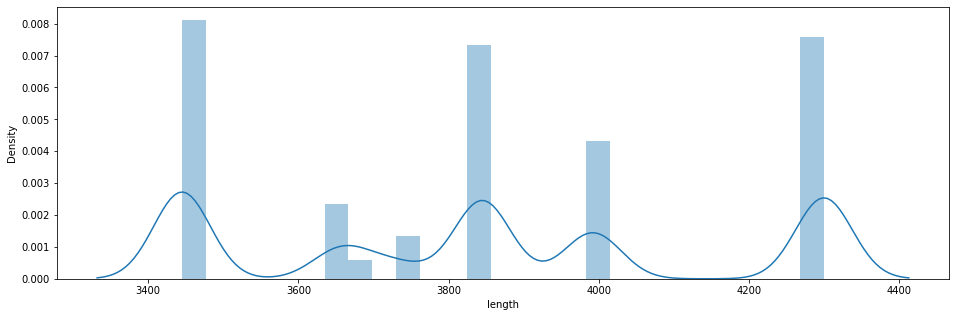

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


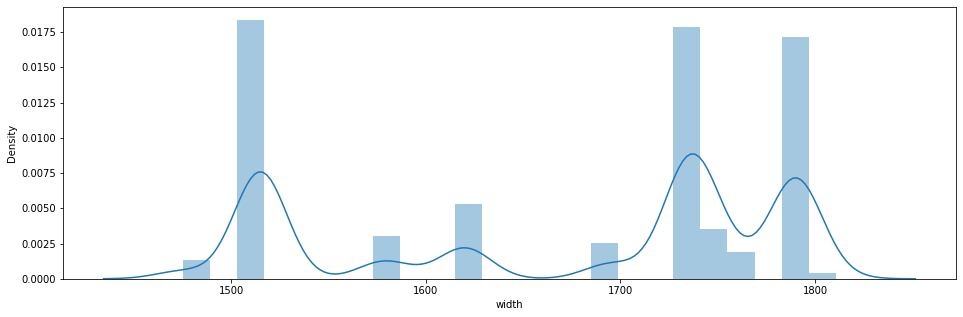

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


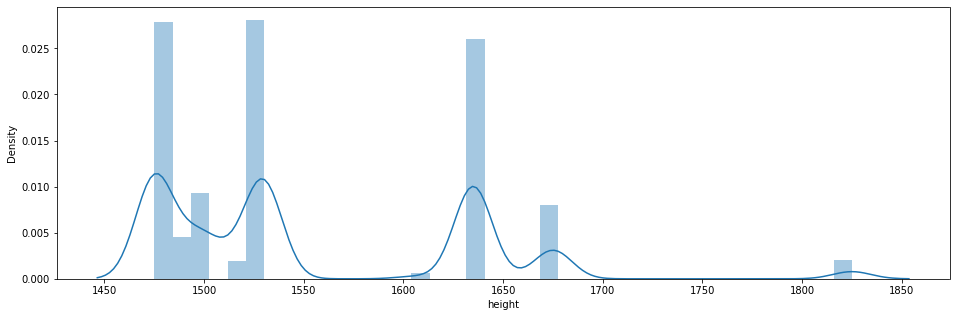

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


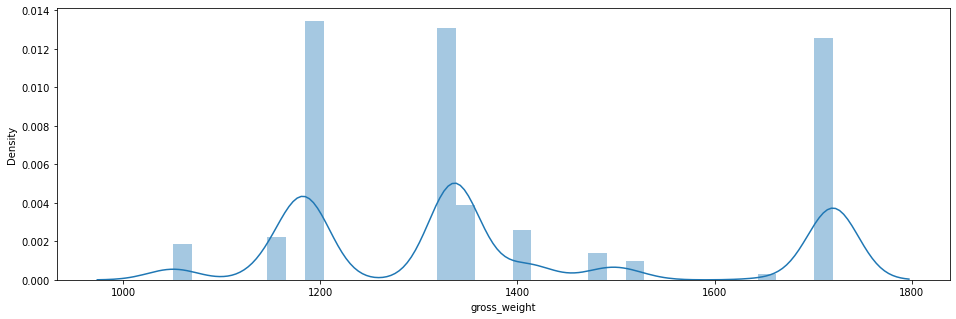

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


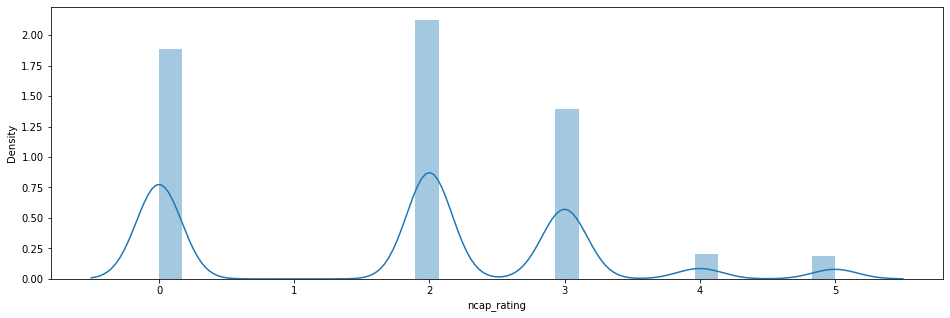

In [359]:
# Distplot
for i in range(len(list(test.columns))):
    if test[test.columns[i]].dtypes == "int64" or test[test.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(test[test.columns[i]])
        plt.show()

In [360]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        print(f'{train.columns[i]} : {train[train.columns[i]].skew()}')

policy_tenure : 0.05358775562003052
age_of_car : 1.0940812262542075
age_of_policyholder : 0.6400493147434646
population_density : 1.6741777983981572
make : 1.1974571138402688
max_torque : 0.6717992135405153
max_power : -0.23659909226263198
airbags : 0.9059463086641714
displacement : -0.10531669398814754
cylinder : -0.5250738315908363
gear_box : 1.1830542487771045
turning_radius : 0.4209828160438497
length : 0.14580093009945527
width : -0.4883916264615361
height : 1.0354977400039849
gross_weight : 0.5469487688387547
ncap_rating : 0.08514657711508809
is_claim : 3.563966961836814


In [361]:
for i in range(len(list(test.columns))):
    if test[test.columns[i]].dtypes == "int64" or test[test.columns[i]].dtypes == "float64":
        print(f'{test.columns[i]} : {test[test.columns[i]].skew()}')

policy_tenure : 0.05559409498726579
age_of_car : 1.1857235793428536
age_of_policyholder : 0.6456124098011398
population_density : 1.675482063634013
make : 1.1956195633677653
max_torque : 0.6743236563177609
max_power : -0.2234956122689179
airbags : 0.9074152155705659
displacement : -0.09141208007954067
cylinder : -0.4971513072787086
gear_box : 1.1809416537851982
turning_radius : 0.4228647884507409
length : 0.1525580637732134
width : -0.4734558971998694
height : 0.9947331105042588
gross_weight : 0.5544607082134904
ncap_rating : 0.08068578811339829


C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


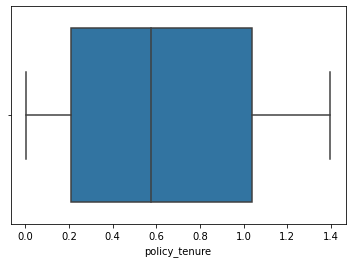

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


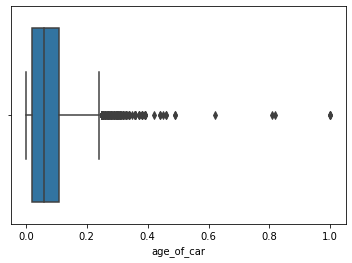

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


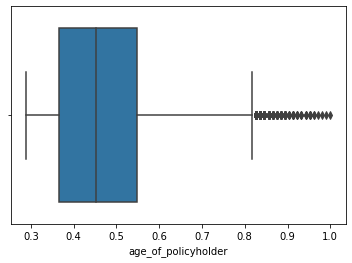

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


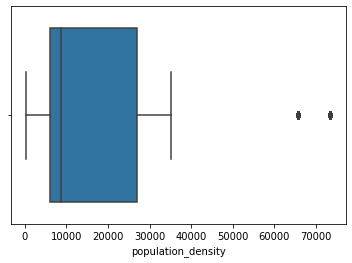

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


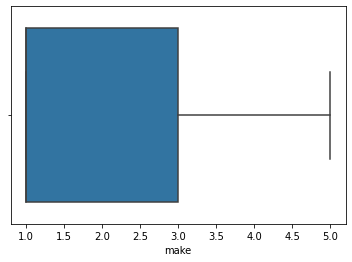

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


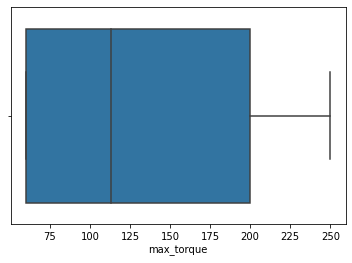

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


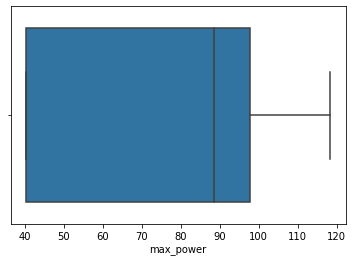

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


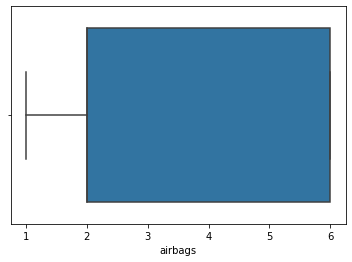

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


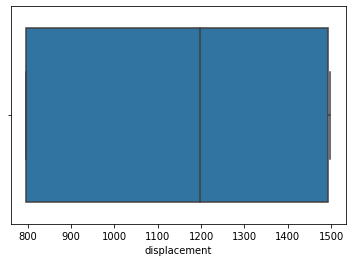

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


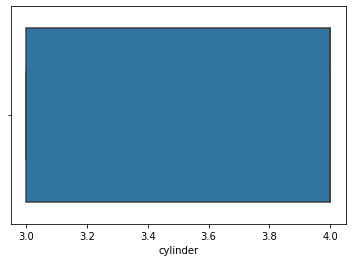

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


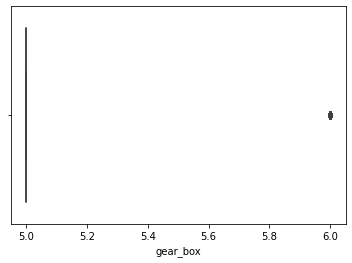

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


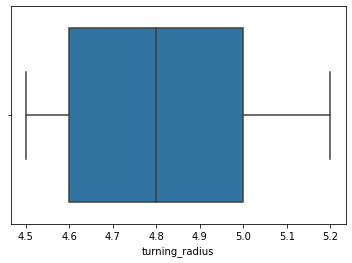

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


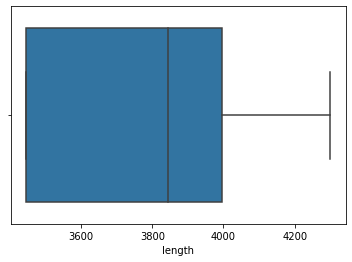

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


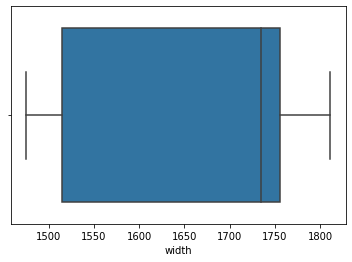

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


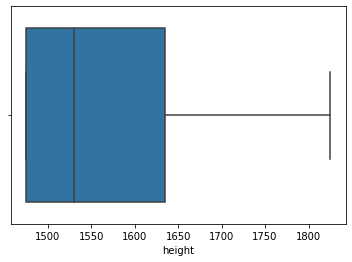

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


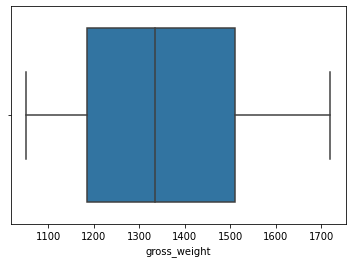

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


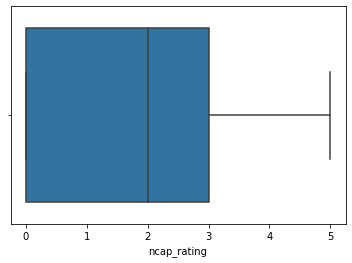

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


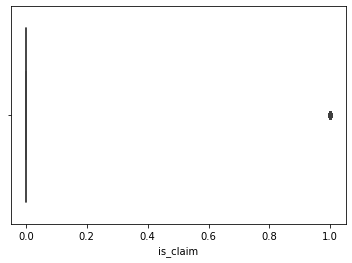

In [362]:
# Boxplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


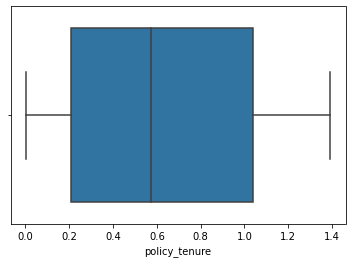

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


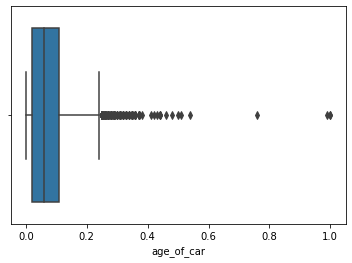

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


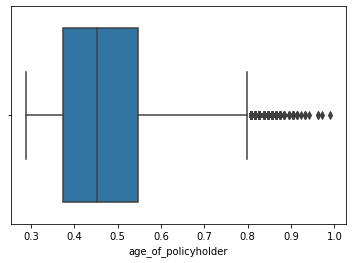

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


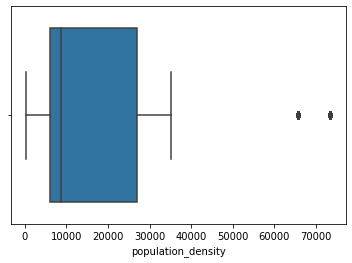

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


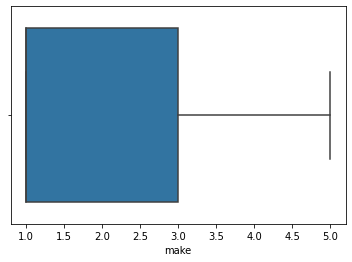

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


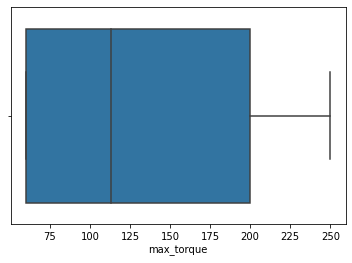

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


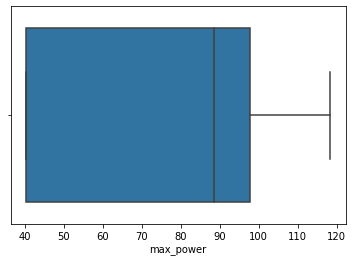

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


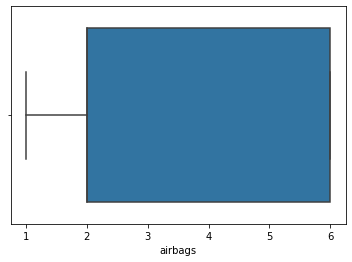

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


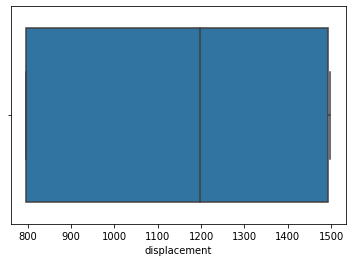

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


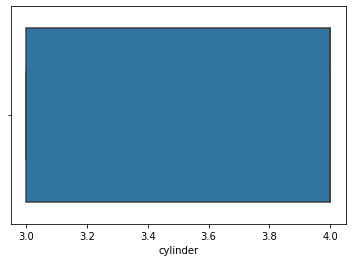

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


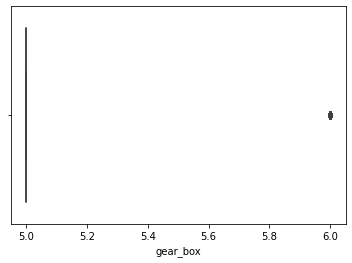

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


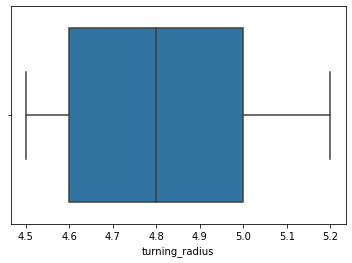

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


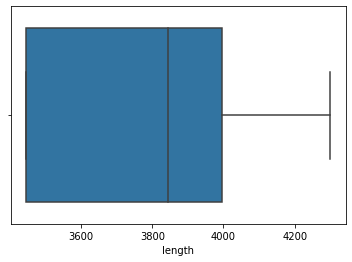

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


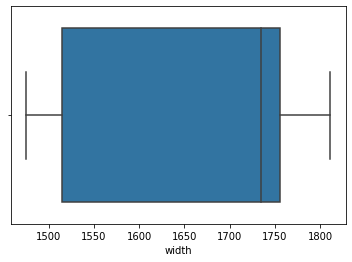

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


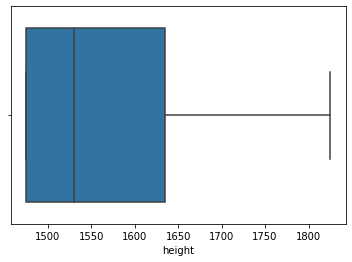

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


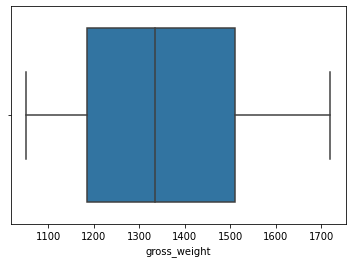

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


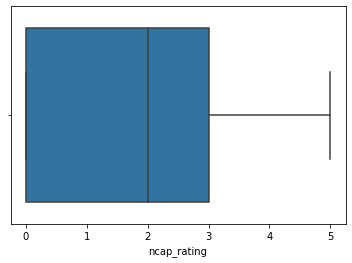

In [363]:
# Boxplot
for i in range(len(list(test.columns))):
    if test[test.columns[i]].dtypes == "int64" or test[test.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(test[test.columns[i]]))
        #plt.xlabel(train.columns[i])

In [364]:
# percentile25 = train["colnames"].quantile(0.25)
# percentile75 = train["colnames"].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

upper_limit_age, lower_limit_age = train["age_of_car"].quantile(0.75) + 1.5 * (train["age_of_car"].quantile(0.75) - train["age_of_car"].quantile(0.25)), train["age_of_car"].quantile(0.75) - 1.5 * (train["age_of_car"].quantile(0.75) - train["age_of_car"].quantile(0.25))

upper_limit_agpol, lower_limit_agpol = train["age_of_policyholder"].quantile(0.75) + 1.5 * (train["age_of_policyholder"].quantile(0.75) - train["age_of_policyholder"].quantile(0.25)), train["age_of_policyholder"].quantile(0.75) - 1.5 * (train["age_of_policyholder"].quantile(0.75) - train["age_of_policyholder"].quantile(0.25))

upper_limit_popd, lower_limit_popd = train["population_density"].quantile(0.75) + 1.5 * (train["population_density"].quantile(0.75) - train["population_density"].quantile(0.25)), train["population_density"].quantile(0.75) - 1.5 * (train["population_density"].quantile(0.75) - train["population_density"].quantile(0.25))

upper_limit_grb, lower_limit_grb = train["gear_box"].quantile(0.75) + 1.5 * (train["gear_box"].quantile(0.75) - train["gear_box"].quantile(0.25)), train["gear_box"].quantile(0.75) - 1.5 * (train["gear_box"].quantile(0.75) - train["gear_box"].quantile(0.25))

upper_limit_isc, lower_limit_isc = train["is_claim"].quantile(0.75) + 1.5 * (train["is_claim"].quantile(0.75) - train["is_claim"].quantile(0.25)), train["is_claim"].quantile(0.75) - 1.5 * (train["is_claim"].quantile(0.75) - train["is_claim"].quantile(0.25))


In [365]:
# CAPPING OUTLIERS

train['age_of_car'] = np.where(train['age_of_car'] > upper_limit_age,upper_limit_age,
                                              np.where(train['age_of_car'] < lower_limit_age,lower_limit_age,
                                              train['age_of_car']))
train['age_of_policyholder'] = np.where(train['age_of_policyholder'] > upper_limit_agpol,upper_limit_agpol,
                                              np.where(train['age_of_policyholder'] < lower_limit_agpol,lower_limit_agpol,
                                              train['age_of_policyholder']))
train['population_density'] = np.where(train['population_density'] > upper_limit_popd,upper_limit_popd,
                                              np.where(train['population_density'] < lower_limit_popd,lower_limit_popd,
                                              train['population_density']))
train['gear_box'] = np.where(train['gear_box'] > upper_limit_grb,upper_limit_grb,
                                              np.where(train['gear_box'] < lower_limit_grb,lower_limit_grb,
                                              train['gear_box']))
# train['is_claim'] = np.where(train['is_claim'] > upper_limit_isc,upper_limit_isc,
#                                               np.where(train['is_claim'] < lower_limit_isc,lower_limit_isc,
#                                               train['is_claim']))



test['age_of_car'] = np.where(test['age_of_car'] > upper_limit_age,upper_limit_age,
                                              np.where(test['age_of_car'] < lower_limit_age,lower_limit_age,
                                              test['age_of_car']))
test['age_of_policyholder'] = np.where(test['age_of_policyholder'] > upper_limit_agpol,upper_limit_agpol,
                                              np.where(test['age_of_policyholder'] < lower_limit_agpol,lower_limit_agpol,
                                              test['age_of_policyholder']))
test['population_density'] = np.where(test['population_density'] > upper_limit_popd,upper_limit_popd,
                                              np.where(test['population_density'] < lower_limit_popd,lower_limit_popd,
                                              test['population_density']))
test['gear_box'] = np.where(test['gear_box'] > upper_limit_grb,upper_limit_grb,
                                              np.where(test['gear_box'] < lower_limit_grb,lower_limit_grb,
                                              test['gear_box']))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


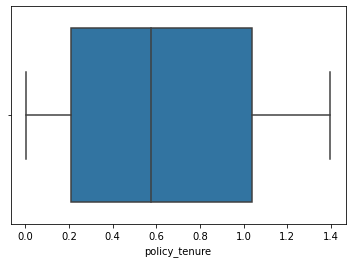

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


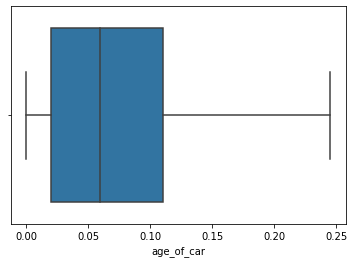

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


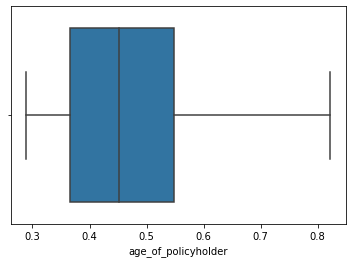

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


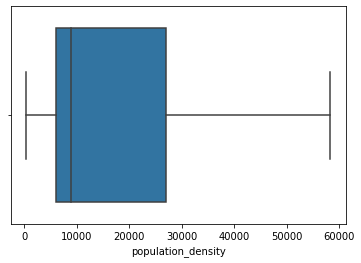

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


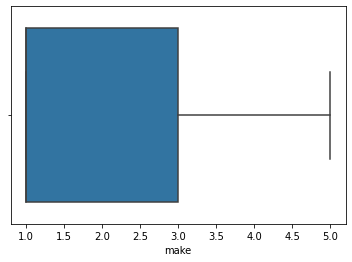

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


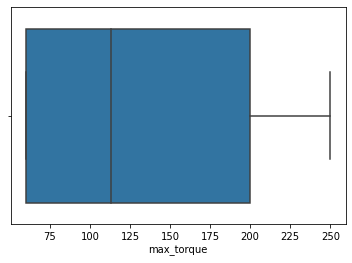

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


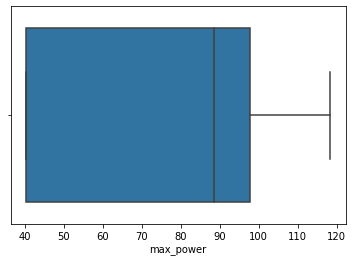

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


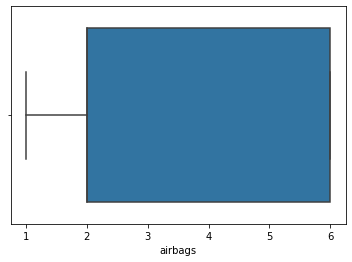

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


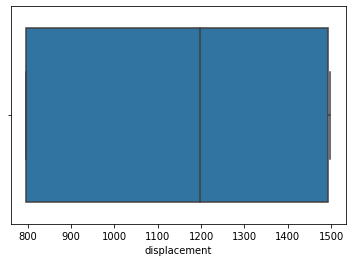

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


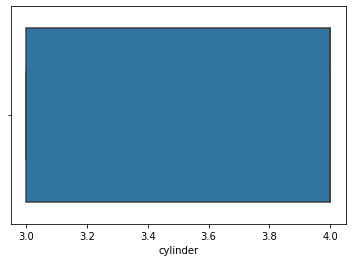

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


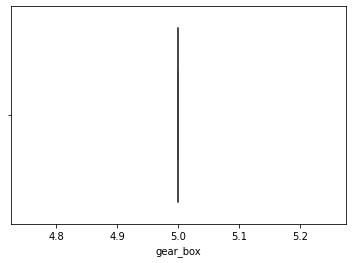

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


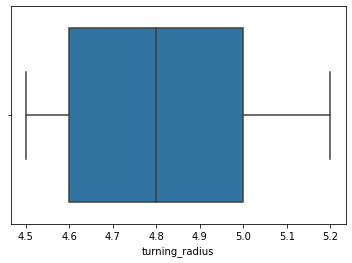

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


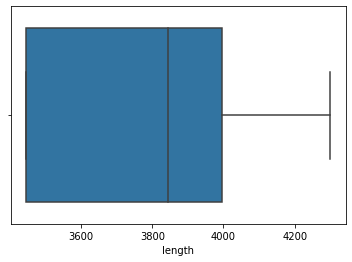

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


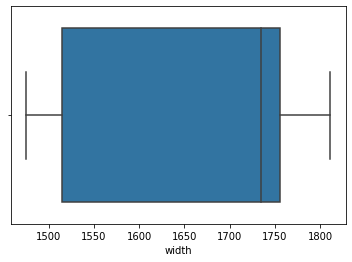

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


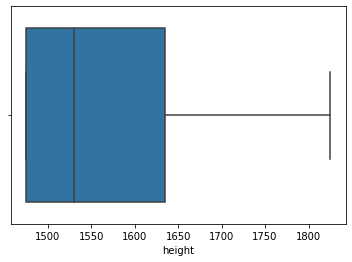

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


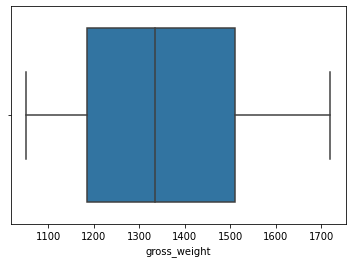

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


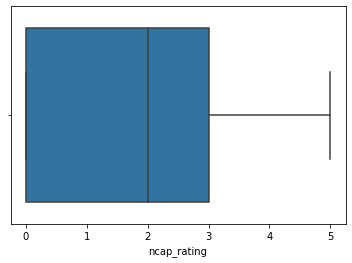

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


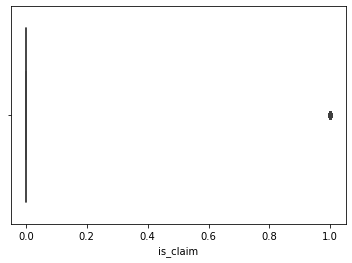

In [366]:
# Boxplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


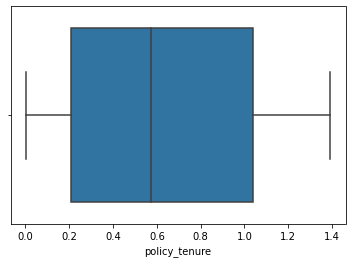

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


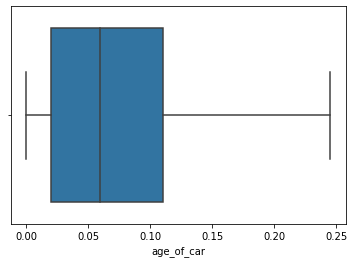

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


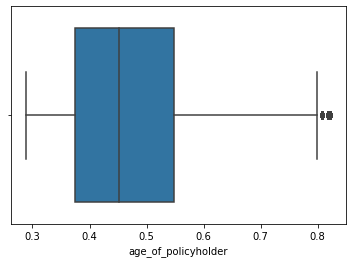

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


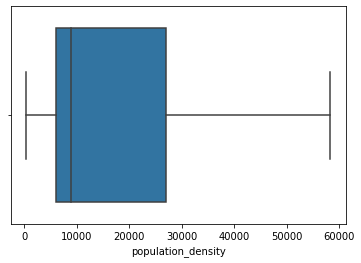

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


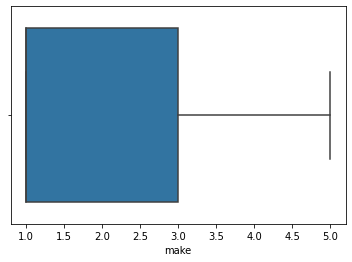

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


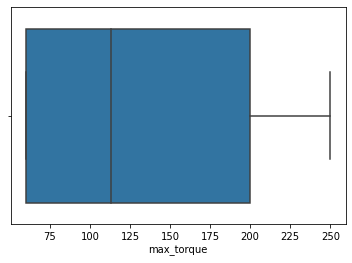

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


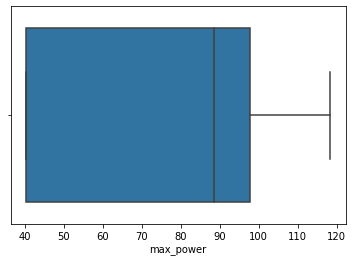

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


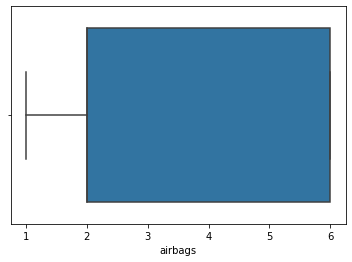

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


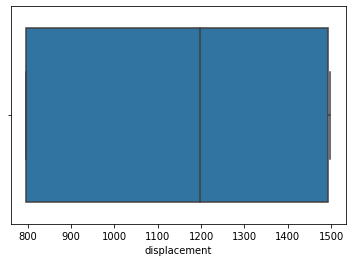

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


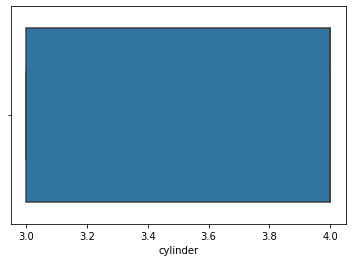

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


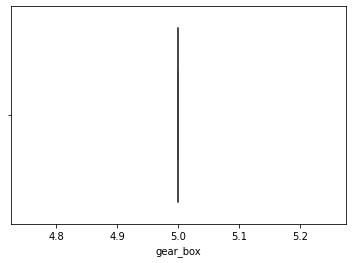

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


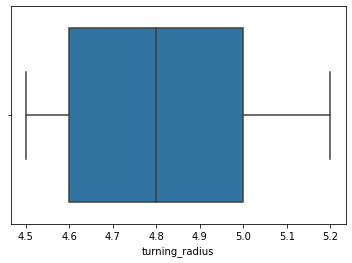

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


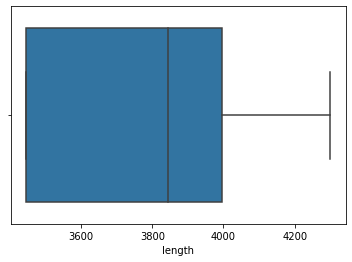

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


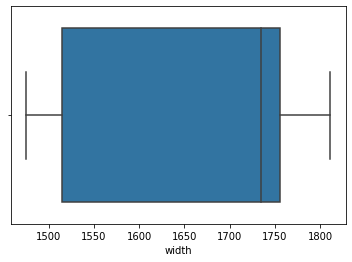

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


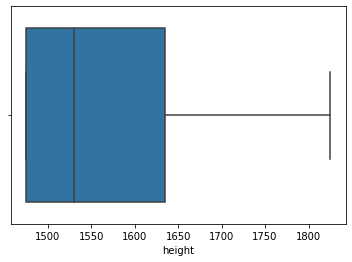

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


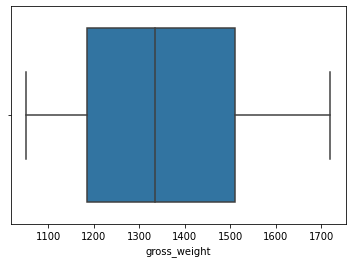

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


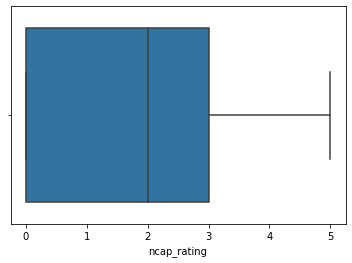

In [367]:
# Boxplot
for i in range(len(list(test.columns))):
    if test[test.columns[i]].dtypes == "int64" or test[test.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(test[test.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


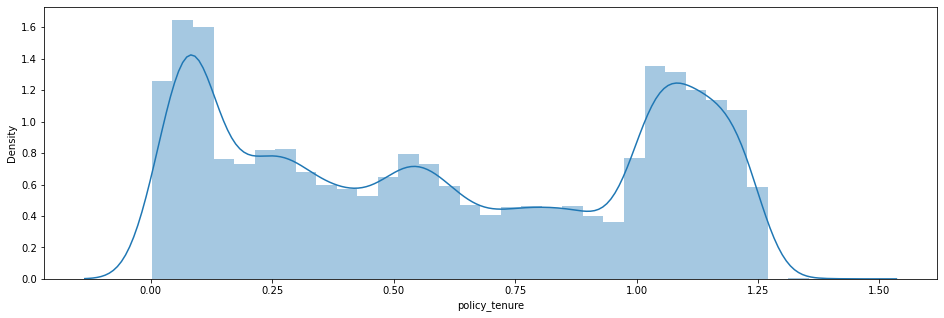

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


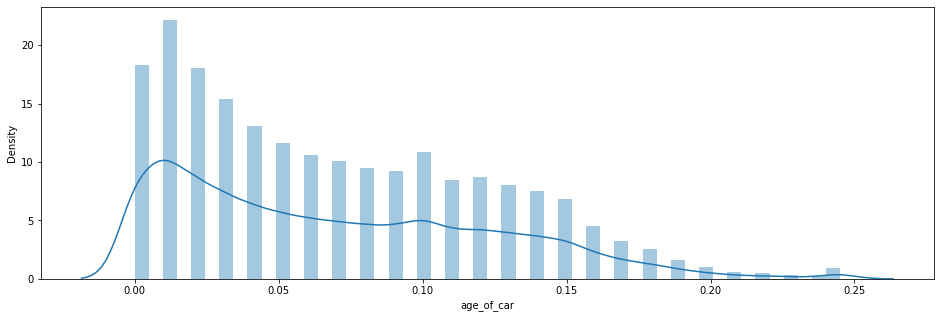

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


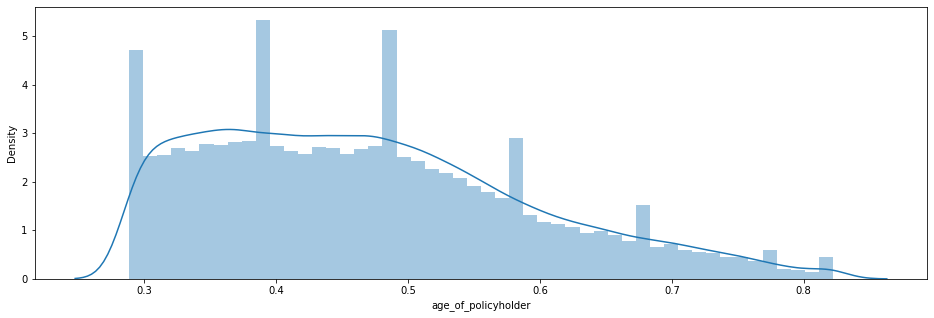

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


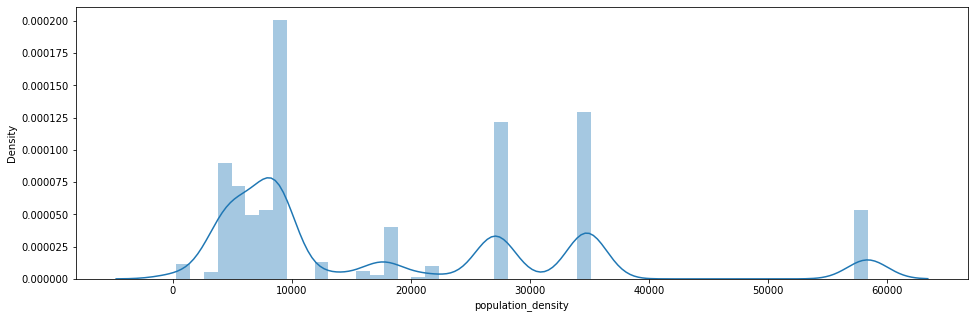

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


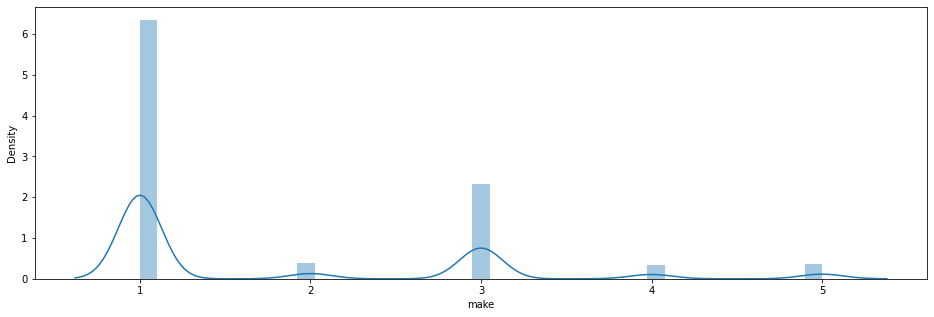

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


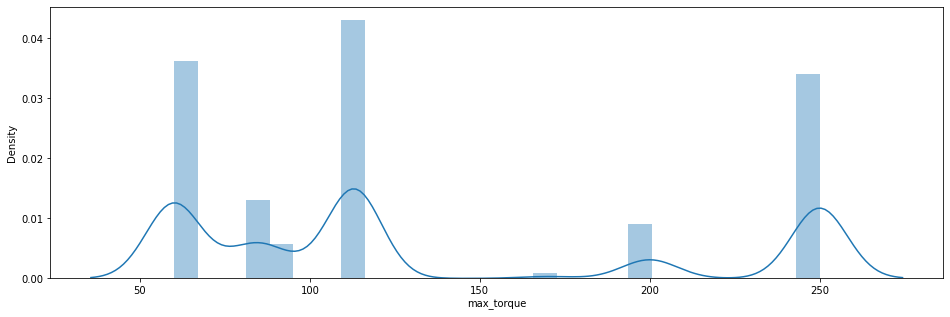

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


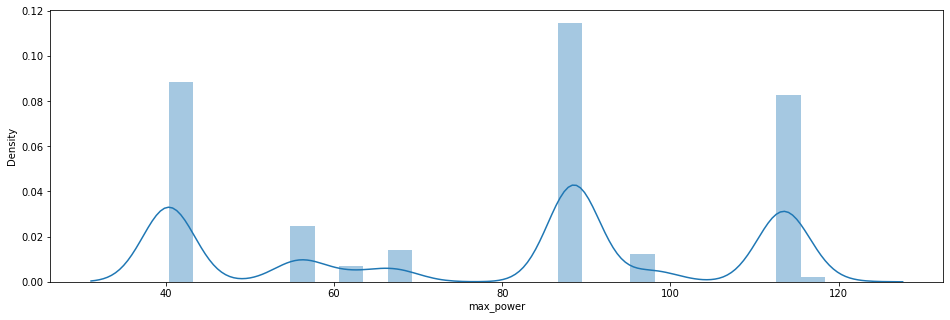

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


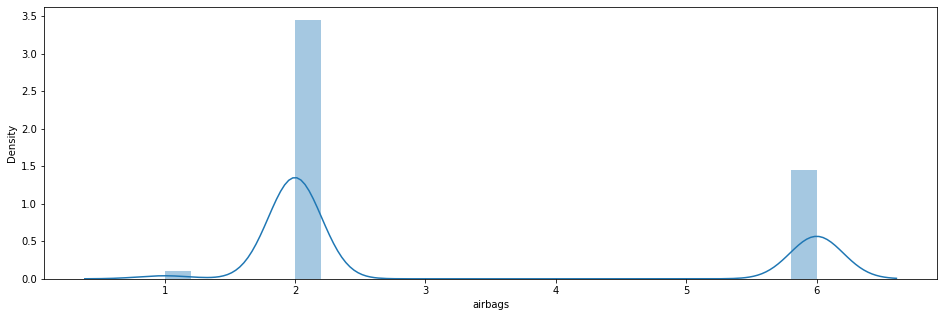

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


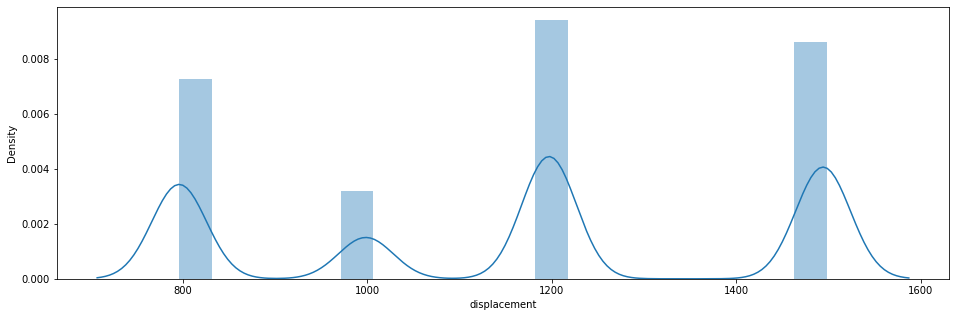

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


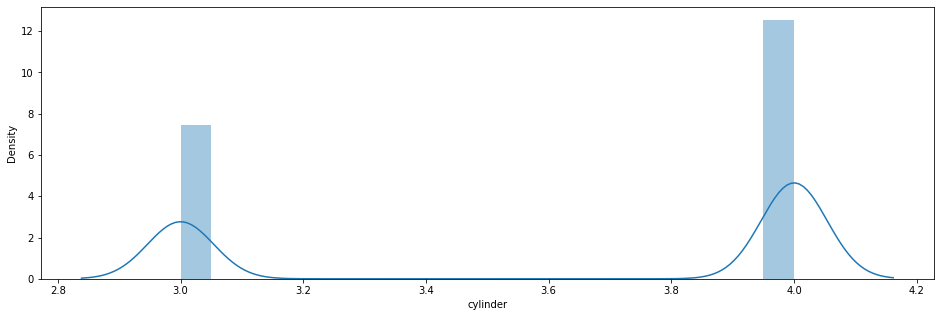

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


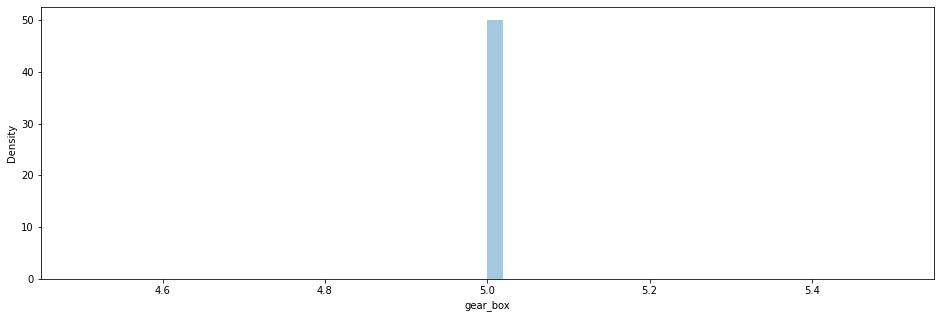

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


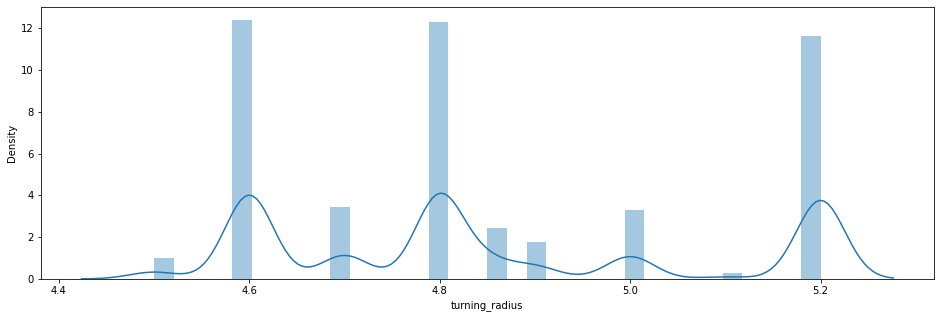

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


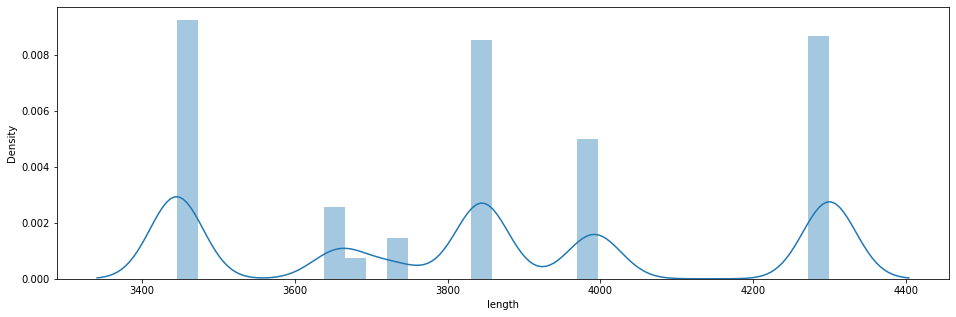

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


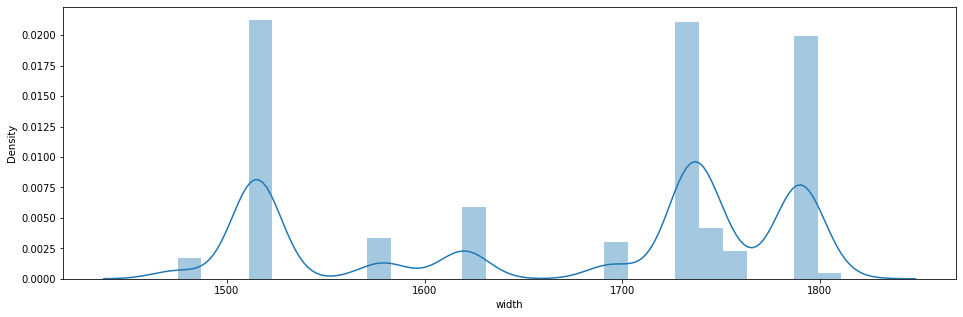

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


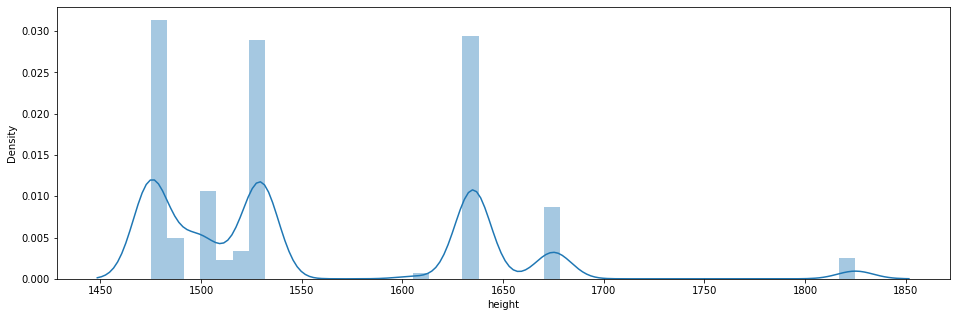

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


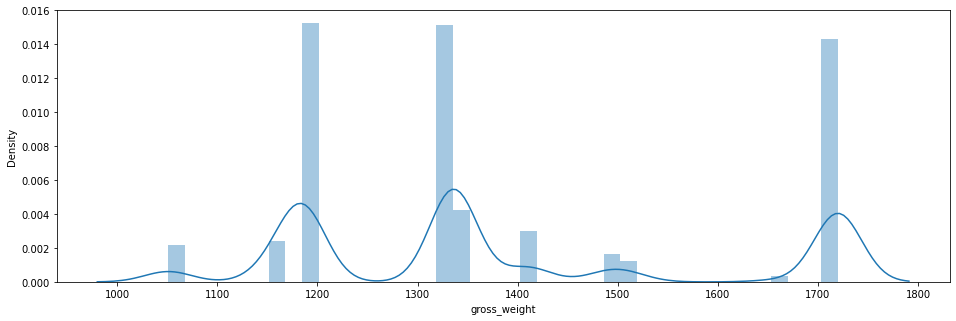

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


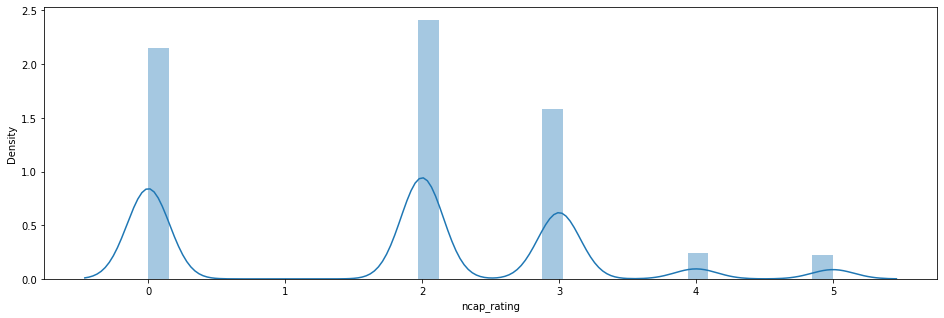

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


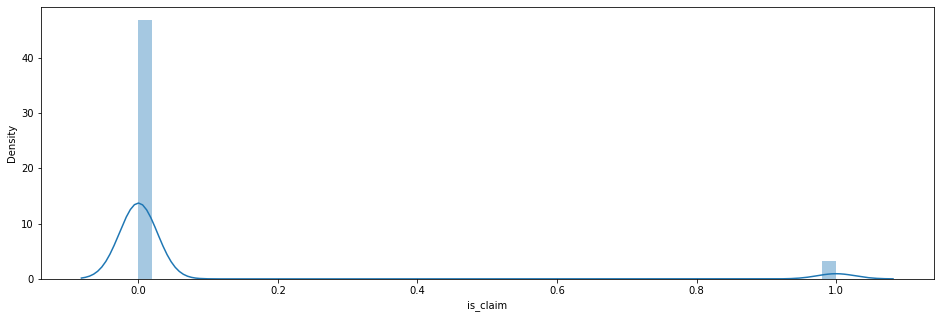

In [368]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(train[train.columns[i]])
        plt.show()

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


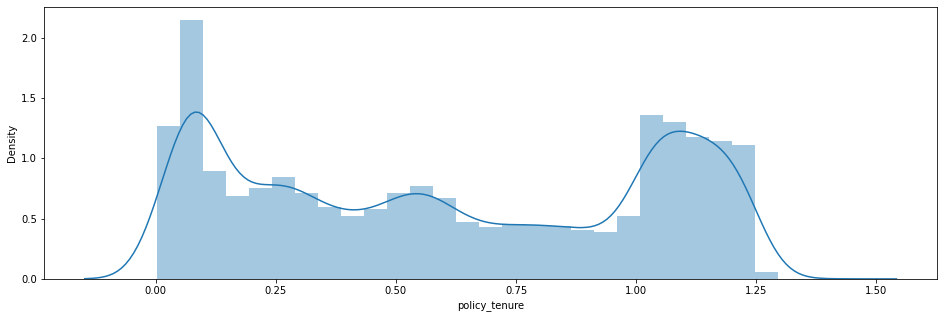

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


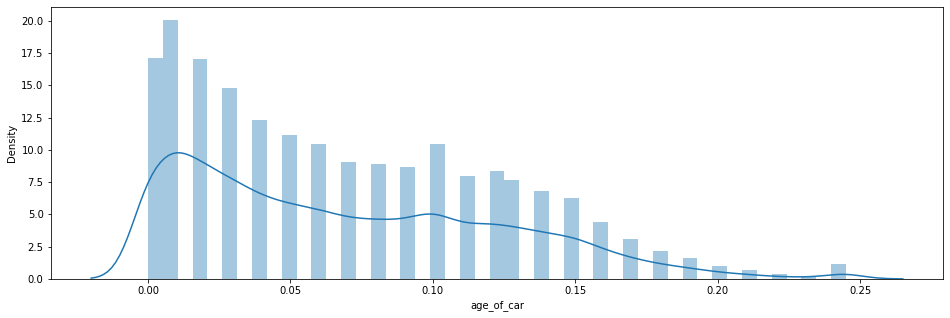

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


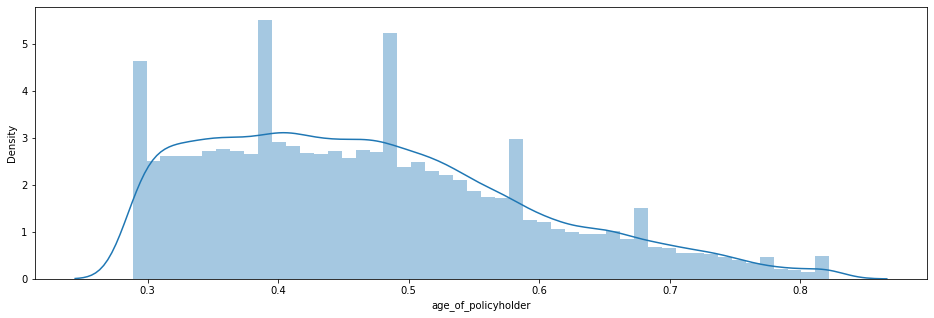

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


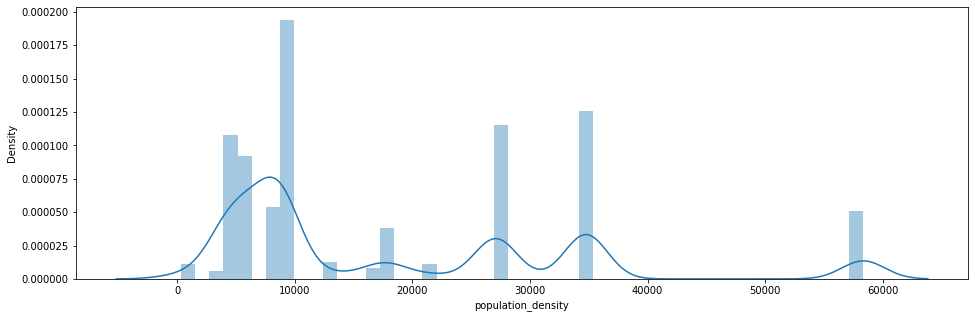

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


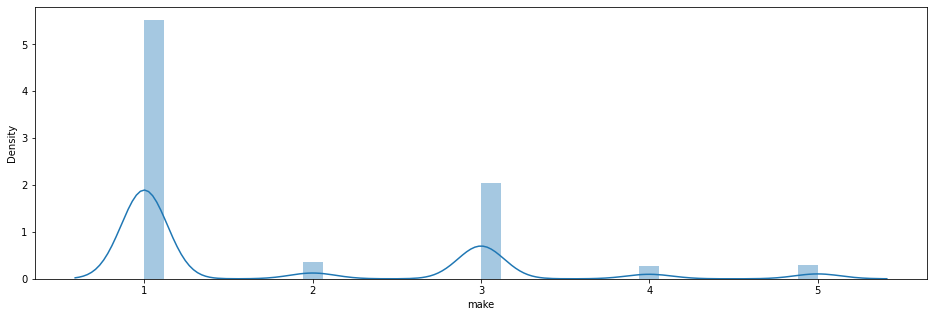

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


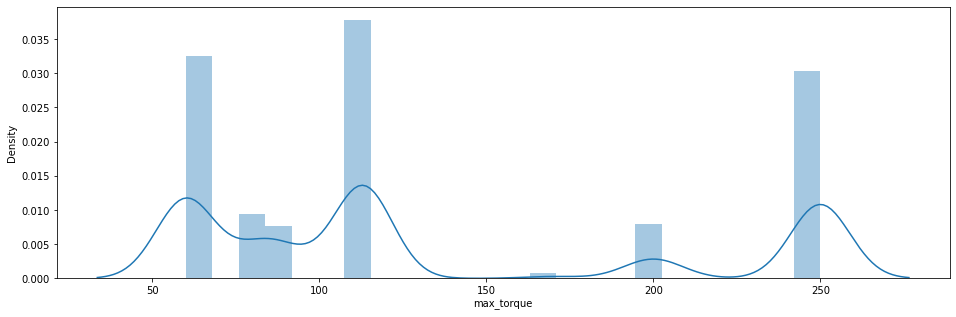

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


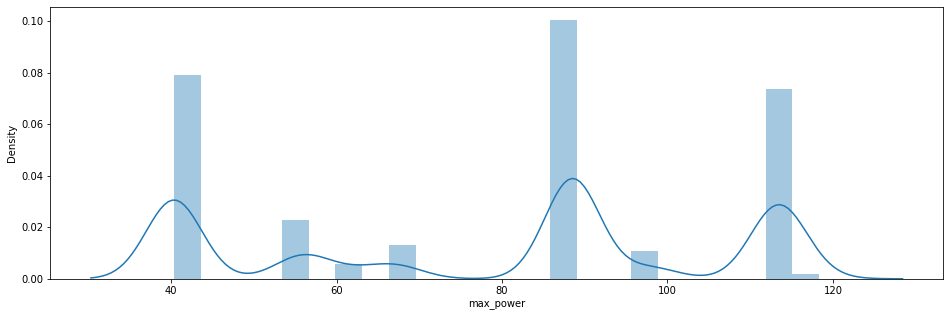

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


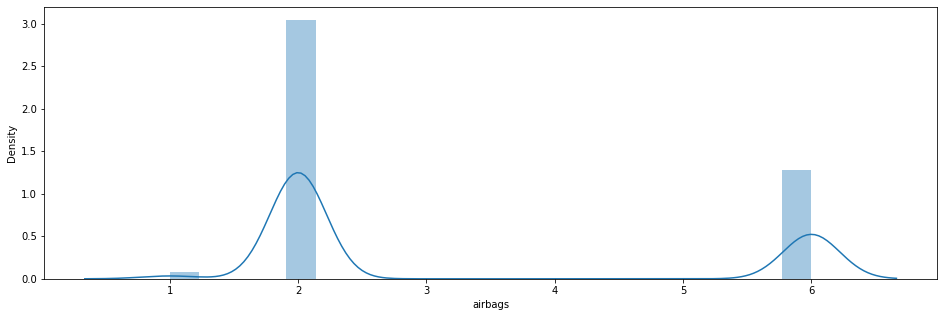

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


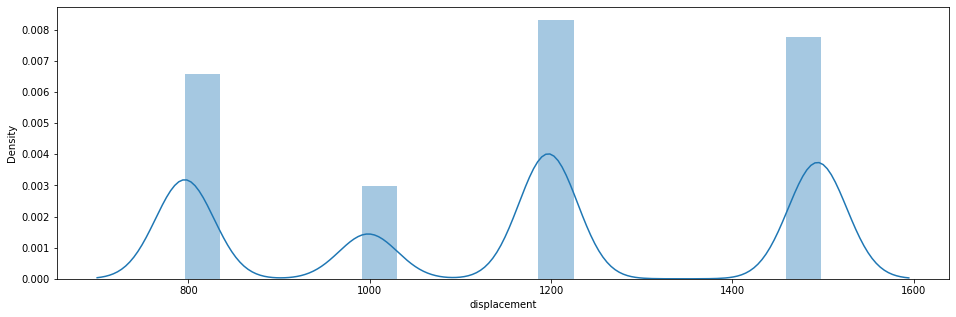

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


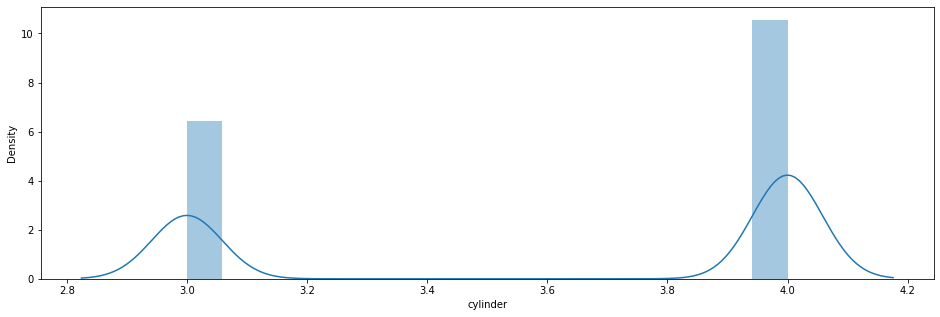

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


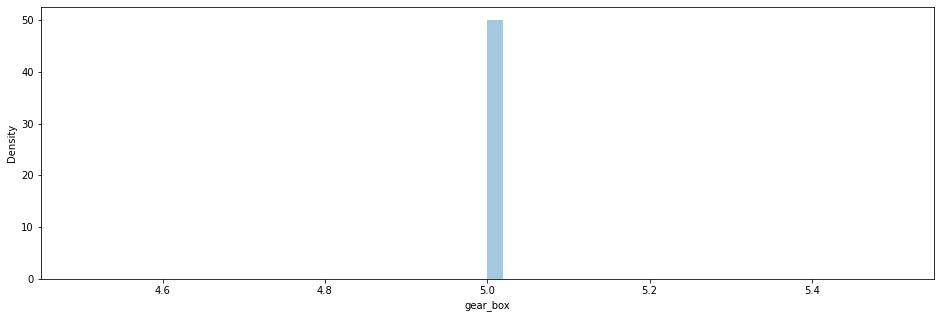

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


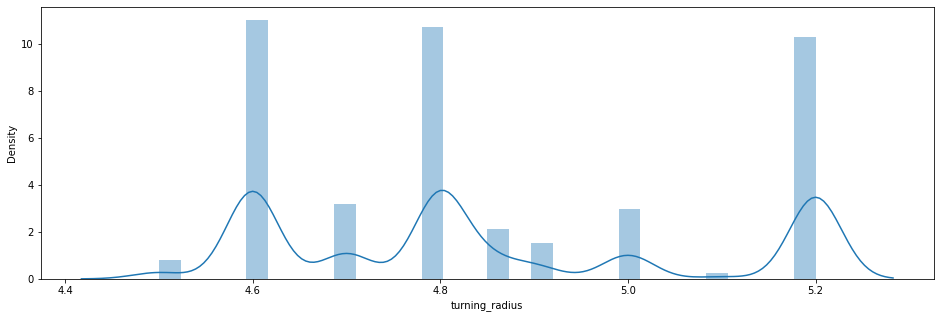

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


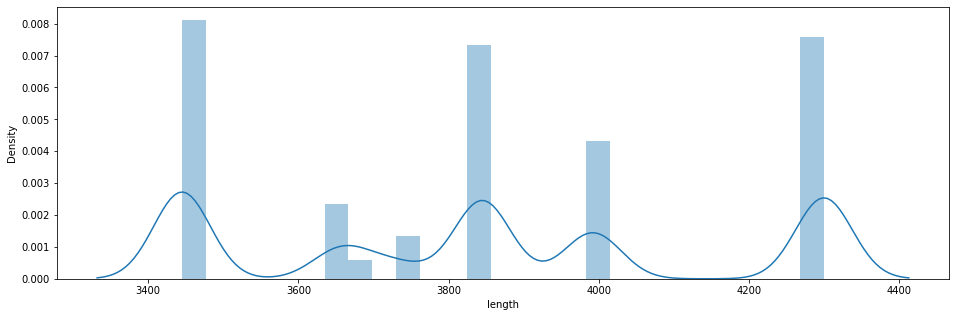

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


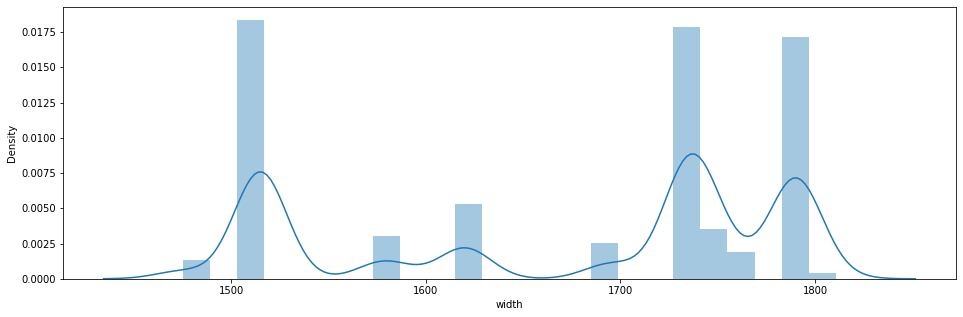

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


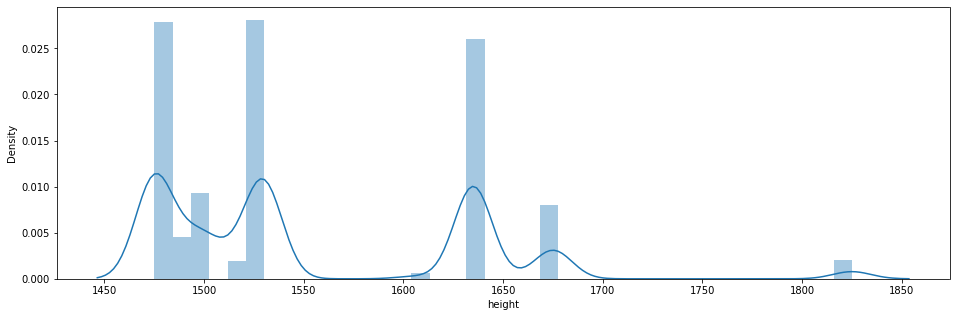

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


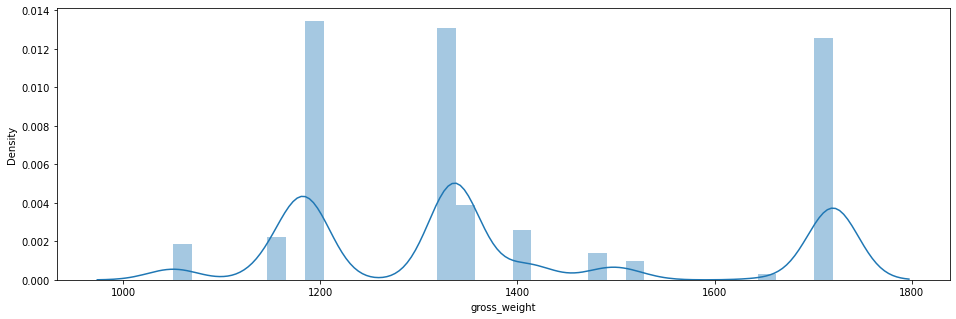

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


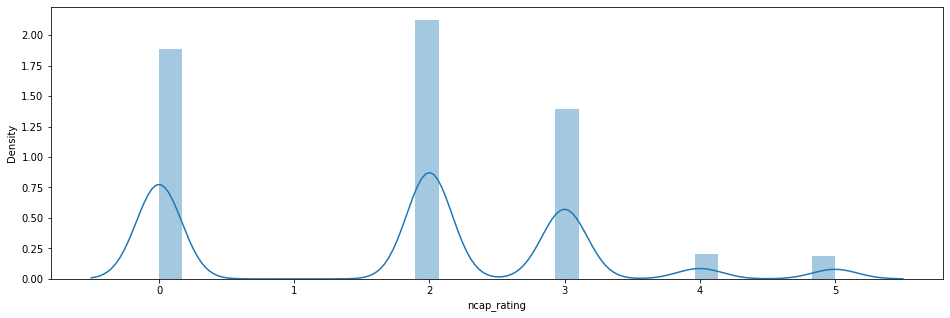

In [369]:
# Distplot
for i in range(len(list(test.columns))):
    if test[test.columns[i]].dtypes == "int64" or test[test.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(test[test.columns[i]])
        plt.show()

In [370]:
train.shape

(58592, 43)

In [371]:
test.shape

(39063, 42)

In [372]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  float64
 10  max_power                         58592 non-null  float64
 11  engine_type                       58592 non-null  object 
 12  airb

In [373]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990.0,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003.0,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076.0,1,A,M1,CNG,60.0,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622.0,1,C1,M2,Petrol,113.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738.0,2,A,M3,Petrol,91.0,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


Handling Categorical Features 

Feature Scaling - Normalization

In [374]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [375]:
x_train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
46835,0.464354,0.07,0.480769,C2,27003.0,1,B1,M8,CNG,82.1,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,2
32236,0.538827,0.08,0.442308,C10,58339.5,3,C2,M4,Diesel,250.0,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
57064,0.092054,0.07,0.365385,C10,58339.5,1,C1,M2,Petrol,113.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
45003,1.080511,0.03,0.403846,C8,8794.0,1,B2,M6,Petrol,113.0,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
40400,0.584736,0.00,0.298077,C5,34738.0,1,A,M1,CNG,60.0,...,No,No,No,No,Yes,No,No,No,Yes,0


In [380]:
y_train.head()

46835    0
32236    0
57064    0
45003    0
40400    0
Name: is_claim, dtype: int64

In [381]:
transformer = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(drop="first", sparse=False), ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']),
    ("tnf2", StandardScaler(), ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'max_torque', 'max_power', 'gear_box', 'turning_radius', 'make', 'airbags', 'displacement', 'cylinder', 'length', 'width', 'height', 'gross_weight', 'ncap_rating'])
], remainder="passthrough")

In [382]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [383]:
x_train.shape

(46873, 86)

In [384]:
test_transformed = transformer.transform(test)

# Model Building

**Logistic Regression**

In [385]:
logr = LogisticRegression()
model = logr.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


93.39534089939414

In [387]:
score = []
for i in range(10):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    logr = LogisticRegression()
    logr.fit(x_train,y_train)
    pred = logr.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

i=  0
93.96706203600989


C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [388]:
logr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

model1 = logr.fit(x_train,y_train)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)*100

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


93.96706203600989

In [390]:
# Training Data Accuracy

pred = model1.predict(x_train)
accuracy_score(y_train, pred)*100      #Generalized

93.51225652294498

In [393]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod1 = cross_val_score(LogisticRegression(), x_train, y_train, cv=10)
print(mod1)
print(np.round(np.mean(mod1),2)*100)

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0.93515358 0.93515358 0.93494027 0.93513975 0.93513975 0.93513975
 0.93513975 0.93513975 0.93513975 0.93513975]
94.0


C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest Classifier**

In [396]:
rfc = RandomForestClassifier(random_state=4)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
accuracy_score(y_test, pred)*100

93.42094035327247

In [397]:
score = []
for i in range(500):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    rfc = RandomForestClassifier(random_state=4, n_jobs=-1)
    rfc.fit(x_train,y_train)
    pred = rfc.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  422
93.76226640498336


In [398]:
rfc = RandomForestClassifier(random_state=4, n_jobs=-1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

model2 = rfc.fit(x_train,y_train)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)*100

93.76226640498336

In [399]:
# Training Data Accuracy

pred = model2.predict(x_train)
accuracy_score(y_train, pred)*100     #Generalized

99.99573315128112

In [400]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod2 = cross_val_score(RandomForestClassifier(random_state=4, n_jobs=-1), x_train, y_train, cv=10)
print(mod2)
print(np.round(np.mean(mod2),2)*100)

[0.92896758 0.92832765 0.93003413 0.93087263 0.92959249 0.928099
 0.93108598 0.93065927 0.92895242 0.92831235]
93.0


In [402]:
test_pred = model1.predict(test_transformed)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [404]:
submission = pd.DataFrame({"policy_id": test_data["policy_id"],"is_claim": test_pred})

In [405]:
submission.head()

,policy_id,is_claim
0,ID58593,0
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0


In [406]:
submission.to_csv('Insurance_Claim_Prediction_submission.csv', index=False)